In [1]:
import pandas as pd
import os

# List of all 11 Excel files in the dataset
file_names = [
    "/Users/hemanthbodala/Downloads/archive-3/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv",
    "/Users/hemanthbodala/Downloads/archive-3/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv",
    "/Users/hemanthbodala/Downloads/archive-3/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyCalories_merged.csv",
    "/Users/hemanthbodala/Downloads/archive-3/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyIntensities_merged.csv",
    "/Users/hemanthbodala/Downloads/archive-3/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlySteps_merged.csv",
    "/Users/hemanthbodala/Downloads/archive-3/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv",
    "/Users/hemanthbodala/Downloads/archive-3/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteIntensitiesNarrow_merged.csv",
    "/Users/hemanthbodala/Downloads/archive-3/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv",
    "/Users/hemanthbodala/Downloads/archive-3/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSleep_merged.csv",
    "/Users/hemanthbodala/Downloads/archive-3/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteStepsNarrow_merged.csv",
    "/Users/hemanthbodala/Downloads/archive-3/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/weightLogInfo_merged.csv"
]

# Dictionary to store dataframes
dataframes = {}

# Read each file and store in the dictionary
for file in file_names:
    try:
        df = pd.read_csv(file)
        dataframes[file] = df
        print(f"Loaded {file}: {df.shape[0]} rows, {df.shape[1]} columns")
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Display sample data from each dataset
for file, df in dataframes.items():
    print(f"\nSample Data from {file}:")
    print(df.head())

# Optional: Save all dataframes in a dictionary for easier access
print("\nAll data loaded successfully!")

Loaded /Users/hemanthbodala/Downloads/archive-3/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv: 457 rows, 15 columns
Loaded /Users/hemanthbodala/Downloads/archive-3/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv: 1154681 rows, 3 columns
Loaded /Users/hemanthbodala/Downloads/archive-3/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyCalories_merged.csv: 24084 rows, 3 columns
Loaded /Users/hemanthbodala/Downloads/archive-3/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyIntensities_merged.csv: 24084 rows, 4 columns
Loaded /Users/hemanthbodala/Downloads/archive-3/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlySteps_merged.csv: 24084 rows, 3 columns
Loaded /Users/hemanthbodala/Downloads/archive-3/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv: 1445040 rows, 3 columns
Loaded /Users/hem

In [2]:
# Calculate unique IDs in each dataset
unique_ids_per_file = {}

# Track all unique IDs across all datasets
all_unique_ids = set()

# Iterate through loaded dataframes
for file, df in dataframes.items():
    if 'Id' in df.columns:
        unique_ids = set(df['Id'].unique())
        unique_ids_per_file[file] = len(unique_ids)
        all_unique_ids.update(unique_ids)

# Display results
print(f"Total Unique IDs Across All Datasets: {len(all_unique_ids)}\n")

print("Unique IDs in Each Dataset:")
for file, count in unique_ids_per_file.items():
    print(f"{file}: {count} unique IDs")

# Identify IDs appearing in multiple datasets
from collections import defaultdict

id_occurrence = defaultdict(set)
for file, df in dataframes.items():
    if 'Id' in df.columns:
        for uid in df['Id'].unique():
            id_occurrence[uid].add(file)

# Display IDs that appear in multiple datasets
multi_appearance_ids = {k: v for k, v in id_occurrence.items() if len(v) > 1}
print(f"\nIDs Appearing in Multiple Datasets: {len(multi_appearance_ids)}")


Total Unique IDs Across All Datasets: 35

Unique IDs in Each Dataset:
/Users/hemanthbodala/Downloads/archive-3/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv: 35 unique IDs
/Users/hemanthbodala/Downloads/archive-3/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv: 14 unique IDs
/Users/hemanthbodala/Downloads/archive-3/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyCalories_merged.csv: 34 unique IDs
/Users/hemanthbodala/Downloads/archive-3/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyIntensities_merged.csv: 34 unique IDs
/Users/hemanthbodala/Downloads/archive-3/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlySteps_merged.csv: 34 unique IDs
/Users/hemanthbodala/Downloads/archive-3/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv: 34 unique IDs
/Users/hemanthbodala/Downloads/archive-3

In [3]:
dataframes['/Users/hemanthbodala/Downloads/archive-3/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv'].head()

,Id,Time,Value
0,2022484408,4/1/2016 7:54:00 AM,93
1,2022484408,4/1/2016 7:54:05 AM,91
2,2022484408,4/1/2016 7:54:10 AM,96
3,2022484408,4/1/2016 7:54:15 AM,98
4,2022484408,4/1/2016 7:54:20 AM,100


In [4]:
# Creating individual dataframes from the loaded data
dailyActivity_df = dataframes['/Users/hemanthbodala/Downloads/archive-3/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv'].copy()
heartrate_df = dataframes['/Users/hemanthbodala/Downloads/archive-3/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv'].copy()
hourlyCalories_df = dataframes['/Users/hemanthbodala/Downloads/archive-3/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyCalories_merged.csv'].copy()
hourlyIntensities_df = dataframes['/Users/hemanthbodala/Downloads/archive-3/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyIntensities_merged.csv'].copy()
hourlySteps_df = dataframes['/Users/hemanthbodala/Downloads/archive-3/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlySteps_merged.csv'].copy()
minuteCalories_df = dataframes['/Users/hemanthbodala/Downloads/archive-3/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv'].copy()
minuteIntensities_df = dataframes['/Users/hemanthbodala/Downloads/archive-3/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteIntensitiesNarrow_merged.csv'].copy()
minuteMETs_df = dataframes['/Users/hemanthbodala/Downloads/archive-3/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv'].copy()
minuteSleep_df = dataframes['/Users/hemanthbodala/Downloads/archive-3/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSleep_merged.csv'].copy()
minuteSteps_df = dataframes['/Users/hemanthbodala/Downloads/archive-3/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteStepsNarrow_merged.csv'].copy()
weightLog_df = dataframes['/Users/hemanthbodala/Downloads/archive-3/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/weightLogInfo_merged.csv'].copy()

# Verifying creation
dfs = {
    "Daily Activity": dailyActivity_df,
    "Heart Rate": heartrate_df,
    "Hourly Calories": hourlyCalories_df,
    "Hourly Intensities": hourlyIntensities_df,
    "Hourly Steps": hourlySteps_df,
    "Minute Calories": minuteCalories_df,
    "Minute Intensities": minuteIntensities_df,
    "Minute METs": minuteMETs_df,
    "Minute Sleep": minuteSleep_df,
    "Minute Steps": minuteSteps_df,
    "Weight Log": weightLog_df
}

# Display dataset details
print("DataFrames Created Successfully!")
for name, df in dfs.items():
    print(f"{name}: {df.shape[0]} rows, {df.shape[1]} columns")


DataFrames Created Successfully!
Daily Activity: 457 rows, 15 columns
Heart Rate: 1154681 rows, 3 columns
Hourly Calories: 24084 rows, 3 columns
Hourly Intensities: 24084 rows, 4 columns
Hourly Steps: 24084 rows, 3 columns
Minute Calories: 1445040 rows, 3 columns
Minute Intensities: 1445040 rows, 3 columns
Minute METs: 1445040 rows, 3 columns
Minute Sleep: 198559 rows, 4 columns
Minute Steps: 1445040 rows, 3 columns
Weight Log: 33 rows, 8 columns


In [5]:
heartrate_df.head(20)

,Id,Time,Value
0,2022484408,4/1/2016 7:54:00 AM,93
1,2022484408,4/1/2016 7:54:05 AM,91
2,2022484408,4/1/2016 7:54:10 AM,96
3,2022484408,4/1/2016 7:54:15 AM,98
4,2022484408,4/1/2016 7:54:20 AM,100
5,2022484408,4/1/2016 7:54:25 AM,101
6,2022484408,4/1/2016 7:54:30 AM,104
7,2022484408,4/1/2016 7:54:35 AM,105
8,2022484408,4/1/2016 7:54:45 AM,102
9,2022484408,4/1/2016 7:54:55 AM,106


In [6]:
import pandas as pd

# Convert 'Time' column to datetime format (handles mixed formats and spacing issues)
heartrate_df['Time'] = pd.to_datetime(heartrate_df['Time'], errors='coerce')

# Filter rows where the 'seconds' part of the timestamp is exactly 0
heartrate_exact_minute_df = heartrate_df[heartrate_df['Time'].dt.second == 0].copy()

# Display results
print(f"New DataFrame Created: {heartrate_exact_minute_df.shape[0]} rows")
print(heartrate_exact_minute_df.head())


New DataFrame Created: 84132 rows
            Id                Time  Value
0   2022484408 2016-04-01 07:54:00     93
19  2022484408 2016-04-01 07:56:00    104
28  2022484408 2016-04-01 07:57:00     91
33  2022484408 2016-04-01 07:58:00     94
41  2022484408 2016-04-01 07:59:00    106


In [7]:
len(heartrate_exact_minute_df)

84132

In [14]:
import sdv
print(f"SDV Version: {sdv.__version__}")

SDV Version: 1.19.0


Synthetic Daily Activity Data Created: 457 rows
  ActivityDate        Id  TotalSteps  TotalDistance  Calories  \
0    3/25/2016  99990001        2747       1.727786      1781   
1    3/26/2016  99990001        7731       4.076389      2202   
2    3/27/2016  99990001        6764       9.320733      2199   
3    3/28/2016  99990001        7384       8.623866      2048   
4    3/29/2016  99990001       10909       5.021166      2251   

   VeryActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  
0                  4                   187              1058  
1                 41                   159              1066  
2                 12                   162              1165  
3                  9                   163              1203  
4                  8                   216              1051  


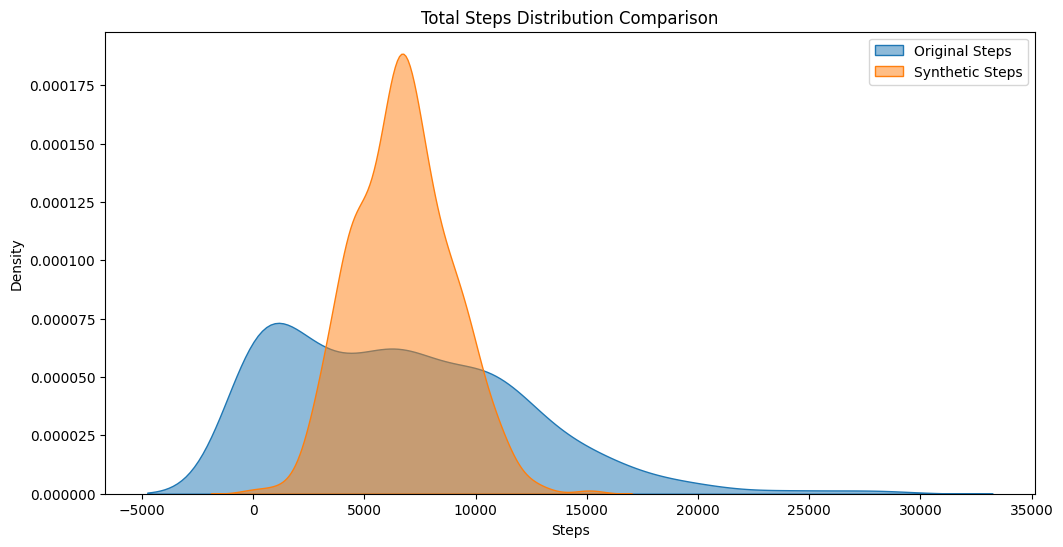

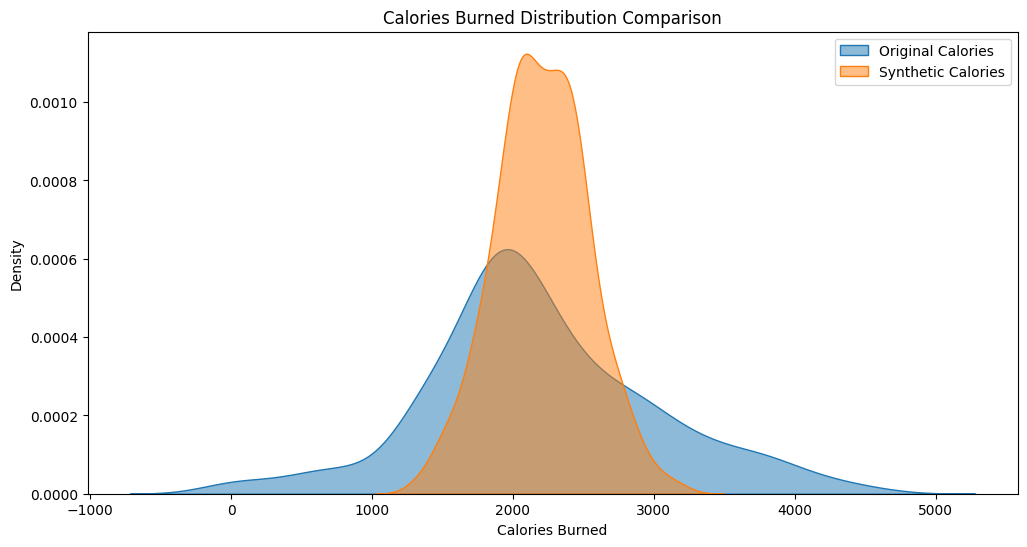

Original Unique IDs: 35
Synthetic Unique IDs: 35

Original ID Distribution:
 Id
4057192912    32
4020332650    32
1503960366    19
1624580081    19
2347167796    15
Name: count, dtype: int64

Synthetic ID Distribution:
 Id
99990015    32
99990014    32
99990001    19
99990002    19
99990009    15
Name: count, dtype: int64


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Identify Key Columns
time_col = 'ActivityDate'
steps_col = 'TotalSteps'
distance_col = 'TotalDistance'
calories_col = 'Calories'
very_active_col = 'VeryActiveMinutes'
lightly_active_col = 'LightlyActiveMinutes'
sedentary_col = 'SedentaryMinutes'

# Step 2: Count Unique IDs and Their Row Counts
id_counts = dailyActivity_df['Id'].value_counts().reset_index()
id_counts.columns = ['Id', 'Row_Count']

# Step 3: Generate New IDs to Match the Original Count
unique_ids = dailyActivity_df['Id'].unique()
synthetic_ids = np.arange(99990001, 99990001 + len(unique_ids))

# Step 4: Generate Synthetic Daily Activity Data
synthetic_daily_activity_data = pd.DataFrame()

# Step 5: Advanced Data Generation for Realism
for idx, original_id in enumerate(unique_ids):
    # Identify the number of rows required for this participant
    num_rows = id_counts.loc[id_counts['Id'] == original_id, 'Row_Count'].values[0]

    # Extract original timestamps for alignment
    original_timestamps = dailyActivity_df[dailyActivity_df['Id'] == original_id][time_col].values

    # Generate synthetic data with controlled distribution
    sampled_rows = pd.DataFrame({time_col: np.tile(original_timestamps, int(np.ceil(num_rows / len(original_timestamps))))[:num_rows]})
    sampled_rows['Id'] = synthetic_ids[idx]

    # Generate values for various activity metrics
    mean_steps, std_steps = dailyActivity_df[steps_col].mean(), dailyActivity_df[steps_col].std()
    sampled_rows[steps_col] = np.random.normal(mean_steps, std_steps * 0.4, size=len(sampled_rows)).astype(int)

    mean_distance, std_distance = dailyActivity_df[distance_col].mean(), dailyActivity_df[distance_col].std()
    sampled_rows[distance_col] = np.random.normal(mean_distance, std_distance * 0.4, size=len(sampled_rows)).astype(float)

    mean_calories, std_calories = dailyActivity_df[calories_col].mean(), dailyActivity_df[calories_col].std()
    sampled_rows[calories_col] = np.random.normal(mean_calories, std_calories * 0.4, size=len(sampled_rows)).astype(int)

    mean_very_active, std_very_active = dailyActivity_df[very_active_col].mean(), dailyActivity_df[very_active_col].std()
    sampled_rows[very_active_col] = np.random.normal(mean_very_active, std_very_active * 0.4, size=len(sampled_rows)).astype(int)

    mean_lightly_active, std_lightly_active = dailyActivity_df[lightly_active_col].mean(), dailyActivity_df[lightly_active_col].std()
    sampled_rows[lightly_active_col] = np.random.normal(mean_lightly_active, std_lightly_active * 0.4, size=len(sampled_rows)).astype(int)

    mean_sedentary, std_sedentary = dailyActivity_df[sedentary_col].mean(), dailyActivity_df[sedentary_col].std()
    sampled_rows[sedentary_col] = np.random.normal(mean_sedentary, std_sedentary * 0.4, size=len(sampled_rows)).astype(int)

    # Clip values to realistic ranges
    sampled_rows[steps_col] = sampled_rows[steps_col].clip(lower=0, upper=30000)
    sampled_rows[distance_col] = sampled_rows[distance_col].clip(lower=0, upper=30)
    sampled_rows[calories_col] = sampled_rows[calories_col].clip(lower=500, upper=5000)
    sampled_rows[very_active_col] = sampled_rows[very_active_col].clip(lower=0, upper=180)
    sampled_rows[lightly_active_col] = sampled_rows[lightly_active_col].clip(lower=0, upper=600)
    sampled_rows[sedentary_col] = sampled_rows[sedentary_col].clip(lower=0, upper=1440)

    synthetic_daily_activity_data = pd.concat([synthetic_daily_activity_data, sampled_rows], ignore_index=True)

synthetic_daily_activity_data.sort_values(by=['Id', time_col], inplace=True)

print(f"Synthetic Daily Activity Data Created: {synthetic_daily_activity_data.shape[0]} rows")
print(synthetic_daily_activity_data.head())

# Visualization to Compare Original vs Synthetic Data
plt.figure(figsize=(12, 6))
sns.kdeplot(dailyActivity_df[steps_col], label='Original Steps', fill=True, alpha=0.5)
sns.kdeplot(synthetic_daily_activity_data[steps_col], label='Synthetic Steps', fill=True, alpha=0.5)
plt.title('Total Steps Distribution Comparison')
plt.xlabel('Steps')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.kdeplot(dailyActivity_df[calories_col], label='Original Calories', fill=True, alpha=0.5)
sns.kdeplot(synthetic_daily_activity_data[calories_col], label='Synthetic Calories', fill=True, alpha=0.5)
plt.title('Calories Burned Distribution Comparison')
plt.xlabel('Calories Burned')
plt.legend()
plt.show()

# Step 6: Validate Results
print(f"Original Unique IDs: {dailyActivity_df['Id'].nunique()}")
print(f"Synthetic Unique IDs: {synthetic_daily_activity_data['Id'].nunique()}")
print("\nOriginal ID Distribution:\n", dailyActivity_df['Id'].value_counts().head())
print("\nSynthetic ID Distribution:\n", synthetic_daily_activity_data['Id'].value_counts().head())


/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/sdv/single_table/base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/sdv/single_table/base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


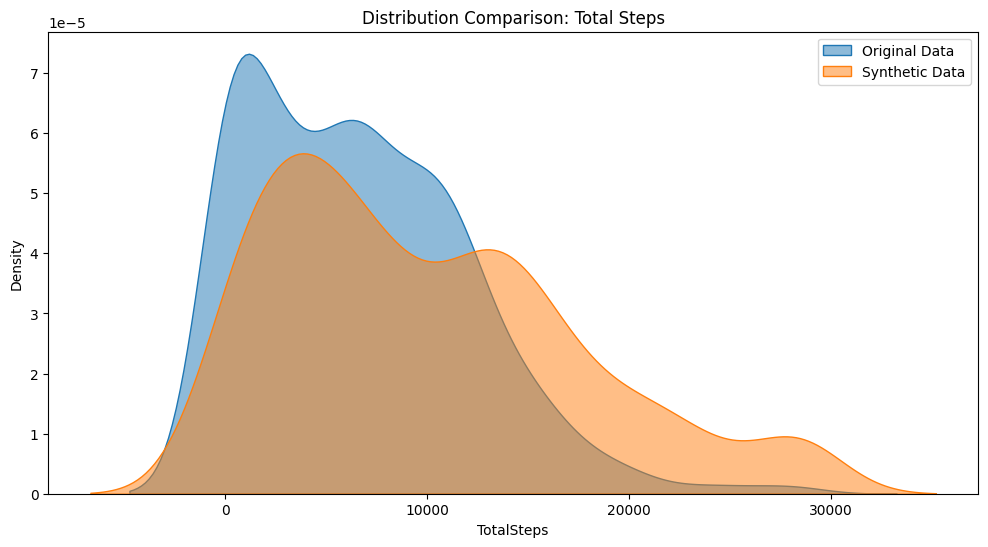

Original Unique IDs: 35
Synthetic Unique IDs: 35

Original ID Distribution:
 Id
4057192912    32
4020332650    32
1503960366    19
1624580081    19
2347167796    15
Name: count, dtype: int64

Synthetic ID Distribution:
 Id
99990015    32
99990014    32
99990001    19
99990002    19
99990009    15
Name: count, dtype: int64


In [57]:
import pandas as pd
import numpy as np
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Prepare Data
data = dailyActivity_df.copy()

# Step 2: Count Unique IDs and Their Row Counts
id_counts = data['Id'].value_counts().reset_index()
id_counts.columns = ['Id', 'Row_Count']

# Step 3: Generate New IDs to Match the Original Count
unique_ids = data['Id'].unique()
synthetic_ids = np.arange(99990001, 99990001 + len(unique_ids))

# Step 4: Define Metadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data)

# Step 5: Train CTGAN Model
model = CTGANSynthesizer(metadata, epochs=300)
model.fit(data)

# Step 6: Generate Synthetic Data
synthetic_data = pd.DataFrame()

# Step 7: Create Synthetic Data by Matching Row Counts
for idx, original_id in enumerate(unique_ids):
    num_rows = id_counts.loc[id_counts['Id'] == original_id, 'Row_Count'].values[0]
    temp_data = model.sample(num_rows)

    # Assign new synthetic ID and align timestamps
    original_timestamps = data[data['Id'] == original_id]['ActivityDate'].values
    temp_data['Id'] = synthetic_ids[idx]
    temp_data['ActivityDate'] = np.tile(original_timestamps, int(np.ceil(num_rows / len(original_timestamps))))[:num_rows]

    synthetic_data = pd.concat([synthetic_data, temp_data], ignore_index=True)

# Step 8: Visual Comparison
plt.figure(figsize=(12, 6))
sns.kdeplot(data['TotalSteps'], label='Original Data', fill=True, alpha=0.5)
sns.kdeplot(synthetic_data['TotalSteps'], label='Synthetic Data', fill=True, alpha=0.5)
plt.title('Distribution Comparison: Total Steps')
plt.legend()
plt.show()

# Step 9: Validate Results
print(f"Original Unique IDs: {data['Id'].nunique()}")
print(f"Synthetic Unique IDs: {synthetic_data['Id'].nunique()}")
print("\nOriginal ID Distribution:\n", data['Id'].value_counts().head())
print("\nSynthetic ID Distribution:\n", synthetic_data['Id'].value_counts().head())


In [58]:
# Count the number of rows for each unique ID in the original data
original_counts = dailyActivity_df['Id'].value_counts().reset_index()
original_counts.columns = ['Id', 'Row_Count']
print("Original Data: Rows per Participant")
print(original_counts)

# Count the number of rows for each unique ID in the synthetic data
synthetic_counts = synthetic_data['Id'].value_counts().reset_index()
synthetic_counts.columns = ['Id', 'Row_Count']
print("\nSynthetic Data: Rows per Participant")
print(synthetic_counts)


Original Data: Rows per Participant
            Id  Row_Count
0   4057192912         32
1   4020332650         32
2   1503960366         19
3   1624580081         19
4   2347167796         15
5   4702921684         15
6   4445114986         15
7   6962181067         14
8   2320127002         12
9   4558609924         12
10  8792009665         12
11  8378563200         12
12  8253242879         12
13  7086361926         12
14  7007744171         12
15  2026352035         12
16  5553957443         12
17  8877689391         12
18  1844505072         12
19  2022484408         12
20  2873212765         12
21  3977333714         12
22  1927972279         12
23  4319703577         12
24  8053475328         11
25  5577150313         11
26  6290855005         10
27  1644430081         10
28  6117666160         10
29  3372868164         10
30  6391747486          9
31  6775888955          9
32  2891001357          8
33  8583815059          8
34  4388161847          8

Synthetic Data: Rows per Pa

/var/folders/7l/0qyscb6530393c111yqnvh6r0000gn/T/ipykernel_48076/995076097.py:21: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time_series = pd.date_range(start=start_time, end=end_time, freq='T')  # 'T' ensures 1-minute steps
/var/folders/7l/0qyscb6530393c111yqnvh6r0000gn/T/ipykernel_48076/995076097.py:21: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time_series = pd.date_range(start=start_time, end=end_time, freq='T')  # 'T' ensures 1-minute steps
/var/folders/7l/0qyscb6530393c111yqnvh6r0000gn/T/ipykernel_48076/995076097.py:21: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time_series = pd.date_range(start=start_time, end=end_time, freq='T')  # 'T' ensures 1-minute steps
/var/folders/7l/0qyscb6530393c111yqnvh6r0000gn/T/ipykernel_48076/995076097.py:21: FutureWarning: 'T' is deprecated and will be removed in a future v

Synthetic Heart Rate Data Created: 216000 rows
                 Time        Id      Value
0 2016-04-01 00:00:00  99990001  53.298550
1 2016-04-01 00:01:00  99990001  61.018098
2 2016-04-01 00:02:00  99990001  74.160999
3 2016-04-01 00:03:00  99990001  77.272053
4 2016-04-01 00:04:00  99990001  58.627619


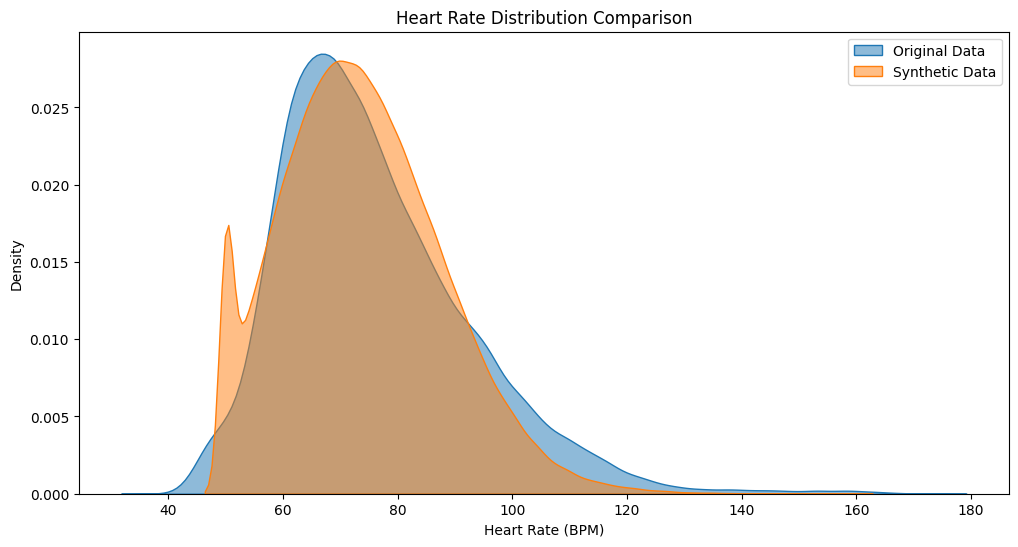

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate 5 New Unique IDs
new_ids = [99990001, 99990002, 99990003, 99990004, 99990005]

# Step 2: Identify Key Columns
time_col = 'Time'
value_col = 'Value'

# Step 3: Generate Synthetic Data
synthetic_hr_data = pd.DataFrame()

# Step 4: Advanced Data Generation for Realism
for new_id in new_ids:
    # Create continuous time series between April 1, 2016, and May 31, 2016
    start_time = pd.to_datetime('2016-04-01 00:00:00')
    end_time = pd.to_datetime('2016-04-30 23:59:00')
    time_series = pd.date_range(start=start_time, end=end_time, freq='T')  # 'T' ensures 1-minute steps

    # Sample structure and set ID
    sampled_rows = pd.DataFrame({time_col: time_series})
    sampled_rows['Id'] = new_id

    # Generate realistic HR values with mean and variability
    mean_hr, std_hr = heartrate_exact_minute_df[value_col].mean(), heartrate_exact_minute_df[value_col].std()
    sampled_rows[value_col] = np.random.normal(mean_hr, std_hr * 0.4, size=len(sampled_rows)).astype(int)

    # Introduce variability based on time of day
    def generate_hr_variability(row):
        hour = row[time_col].hour
        base_value = np.random.normal(70, 10)
        if hour in range(6, 12):    # Morning peak
            return base_value + np.random.normal(15, 5)
        elif hour in range(12, 18): # Afternoon
            return base_value + np.random.normal(5, 3)
        else:                       # Evening/Night rest
            return base_value + np.random.normal(-5, 3)

    sampled_rows[value_col] = sampled_rows.apply(generate_hr_variability, axis=1)

    # Introduce occasional spikes for workouts, stress, or excitement
    spike_indices = np.random.choice(sampled_rows.index, size=int(0.1 * len(sampled_rows)), replace=False)
    sampled_rows.loc[spike_indices, value_col] *= np.random.uniform(0.8, 1.5)

    # Clip values to ensure HR stays in a realistic range
    sampled_rows[value_col] = sampled_rows[value_col].clip(lower=50, upper=180)

    synthetic_hr_data = pd.concat([synthetic_hr_data, sampled_rows], ignore_index=True)

synthetic_hr_data.sort_values(by=['Id', time_col], inplace=True)

print(f"Synthetic Heart Rate Data Created: {synthetic_hr_data.shape[0]} rows")
print(synthetic_hr_data.head())

# Visualization to Compare Original vs Synthetic Data
plt.figure(figsize=(12, 6))
sns.kdeplot(heartrate_exact_minute_df[value_col], label='Original Data', fill=True, alpha=0.5)
sns.kdeplot(synthetic_hr_data[value_col], label='Synthetic Data', fill=True, alpha=0.5)
plt.title('Heart Rate Distribution Comparison')
plt.xlabel('Heart Rate (BPM)')
plt.legend()
plt.show()


Synthetic Heart Rate Data Created: 84132 rows
                 Time        Id       Value
0 2016-04-01 07:54:00  99990001  157.471511
1 2016-04-01 07:56:00  99990001   90.825682
2 2016-04-01 07:57:00  99990001   83.189350
3 2016-04-01 07:58:00  99990001   80.258597
4 2016-04-01 07:59:00  99990001   88.604277


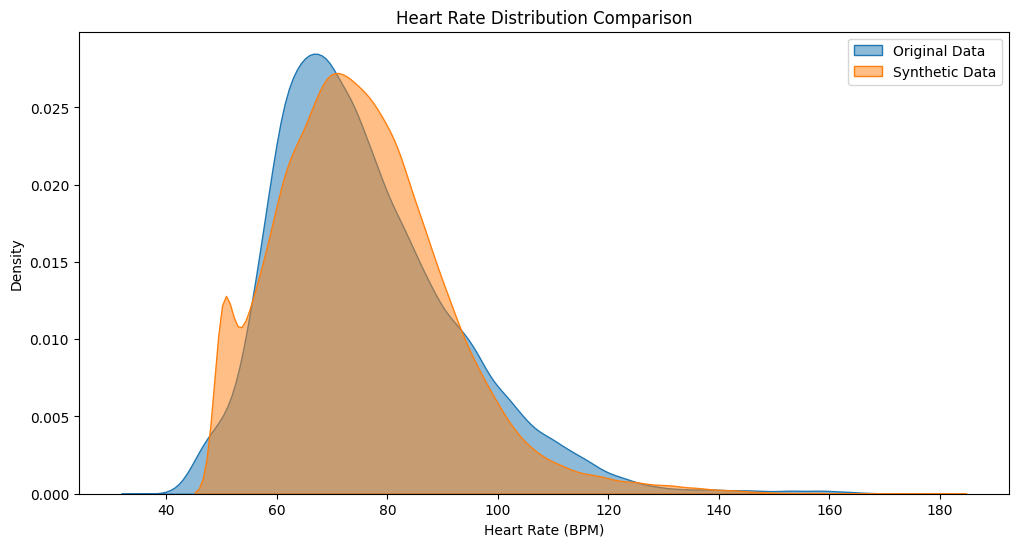

Original Unique IDs: 14
Synthetic Unique IDs: 14

Original ID Distribution:
 Id
2347167796    12176
6962181067    11906
5577150313     9257
5553957443     9154
8792009665     7635
Name: count, dtype: int64

Synthetic ID Distribution:
 Id
99990003    12176
99990011    11906
99990007     9257
99990006     9154
99990013     7635
Name: count, dtype: int64


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Identify Key Columns
time_col = 'Time'
value_col = 'Value'

# Step 2: Count Unique IDs and Their Row Counts
id_counts = heartrate_exact_minute_df['Id'].value_counts().reset_index()
id_counts.columns = ['Id', 'Row_Count']

# Step 3: Generate New IDs to Match the Original Count
unique_ids = heartrate_exact_minute_df['Id'].unique()
synthetic_ids = np.arange(99990001, 99990001 + len(unique_ids))

# Step 4: Generate Synthetic Heart Rate Data
synthetic_hr_data = pd.DataFrame()

# Step 5: Advanced Data Generation for Realism
for idx, original_id in enumerate(unique_ids):
    # Identify the number of rows required for this participant
    num_rows = id_counts.loc[id_counts['Id'] == original_id, 'Row_Count'].values[0]

    # Extract original timestamps for alignment
    original_timestamps = heartrate_exact_minute_df[heartrate_exact_minute_df['Id'] == original_id][time_col].values

    # Generate synthetic HR data with controlled distribution
    sampled_rows = pd.DataFrame({time_col: np.tile(original_timestamps, int(np.ceil(num_rows / len(original_timestamps))))[:num_rows]})
    sampled_rows['Id'] = synthetic_ids[idx]

    # Generate heart rate values with improved distribution control
    mean_hr, std_hr = heartrate_exact_minute_df[value_col].mean(), heartrate_exact_minute_df[value_col].std()
    sampled_rows[value_col] = np.random.normal(mean_hr, std_hr * 0.4, size=len(sampled_rows)).astype(int)

    # Introduce variability based on time of day
    def generate_hr_variability(row):
        hour = pd.to_datetime(row[time_col]).hour
        base_value = np.random.normal(70, 10)
        if hour in range(6, 12):    # Morning peak
            return base_value + np.random.normal(15, 5)
        elif hour in range(12, 18): # Afternoon
            return base_value + np.random.normal(5, 3)
        else:                       # Evening/Night rest
            return base_value + np.random.normal(-5, 3)

    sampled_rows[value_col] = sampled_rows.apply(generate_hr_variability, axis=1)

    # Introduce occasional spikes for workouts, stress, or excitement
    spike_indices = np.random.choice(sampled_rows.index, size=int(0.1 * len(sampled_rows)), replace=False)
    sampled_rows.loc[spike_indices, value_col] *= np.random.uniform(0.8, 1.5)

    # Clip values to ensure HR stays in a realistic range
    sampled_rows[value_col] = sampled_rows[value_col].clip(lower=50, upper=180)

    synthetic_hr_data = pd.concat([synthetic_hr_data, sampled_rows], ignore_index=True)

synthetic_hr_data.sort_values(by=['Id', time_col], inplace=True)

print(f"Synthetic Heart Rate Data Created: {synthetic_hr_data.shape[0]} rows")
print(synthetic_hr_data.head())

# Visualization to Compare Original vs Synthetic Data
plt.figure(figsize=(12, 6))
sns.kdeplot(heartrate_exact_minute_df[value_col], label='Original Data', fill=True, alpha=0.5)
sns.kdeplot(synthetic_hr_data[value_col], label='Synthetic Data', fill=True, alpha=0.5)
plt.title('Heart Rate Distribution Comparison')
plt.xlabel('Heart Rate (BPM)')
plt.legend()
plt.show()

# Step 6: Validate Results
print(f"Original Unique IDs: {heartrate_exact_minute_df['Id'].nunique()}")
print(f"Synthetic Unique IDs: {synthetic_hr_data['Id'].nunique()}")
print("\nOriginal ID Distribution:\n", heartrate_exact_minute_df['Id'].value_counts().head())
print("\nSynthetic ID Distribution:\n", synthetic_hr_data['Id'].value_counts().head())


In [60]:
# Count rows per ID in the original data
original_id_counts = heartrate_exact_minute_df['Id'].value_counts().reset_index()
original_id_counts.columns = ['Id', 'Row_Count']
print("Original Data: Rows per Participant")
print(original_id_counts)

# Count rows per ID in the synthetic data
synthetic_id_counts = synthetic_hr_data['Id'].value_counts().reset_index()
synthetic_id_counts.columns = ['Id', 'Row_Count']
print("\nSynthetic Data: Rows per Participant")
print(synthetic_id_counts)


Original Data: Rows per Participant
            Id  Row_Count
0   2347167796      12176
1   6962181067      11906
2   5577150313       9257
3   5553957443       9154
4   8792009665       7635
5   4558609924       6894
6   7007744171       6092
7   6117666160       5566
8   2022484408       5141
9   4020332650       4674
10  6775888955       3529
11  8877689391       1641
12  6391747486        429
13  2026352035         38

Synthetic Data: Rows per Participant
          Id  Row_Count
0   99990003      12176
1   99990011      11906
2   99990007       9257
3   99990006       9154
4   99990013       7635
5   99990005       6894
6   99990012       6092
7   99990008       5566
8   99990001       5141
9   99990004       4674
10  99990010       3529
11  99990014       1641
12  99990009        429
13  99990002         38


In [41]:
hourlyCalories_df

,Id,ActivityHour,Calories
0,1503960366,3/12/2016 12:00:00 AM,48
1,1503960366,3/12/2016 1:00:00 AM,48
2,1503960366,3/12/2016 2:00:00 AM,48
3,1503960366,3/12/2016 3:00:00 AM,48
4,1503960366,3/12/2016 4:00:00 AM,48
...,...,...,...
24079,8877689391,4/12/2016 4:00:00 AM,73
24080,8877689391,4/12/2016 5:00:00 AM,73
24081,8877689391,4/12/2016 6:00:00 AM,96
24082,8877689391,4/12/2016 7:00:00 AM,169


Synthetic Hourly Calories Data Created: 24084 rows
             ActivityHour        Id    Calories
10  3/12/2016 10:00:00 AM  99990001  105.056221
22  3/12/2016 10:00:00 PM  99990001   85.808821
11  3/12/2016 11:00:00 AM  99990001  101.816887
23  3/12/2016 11:00:00 PM  99990001  103.312105
0   3/12/2016 12:00:00 AM  99990001   84.448511


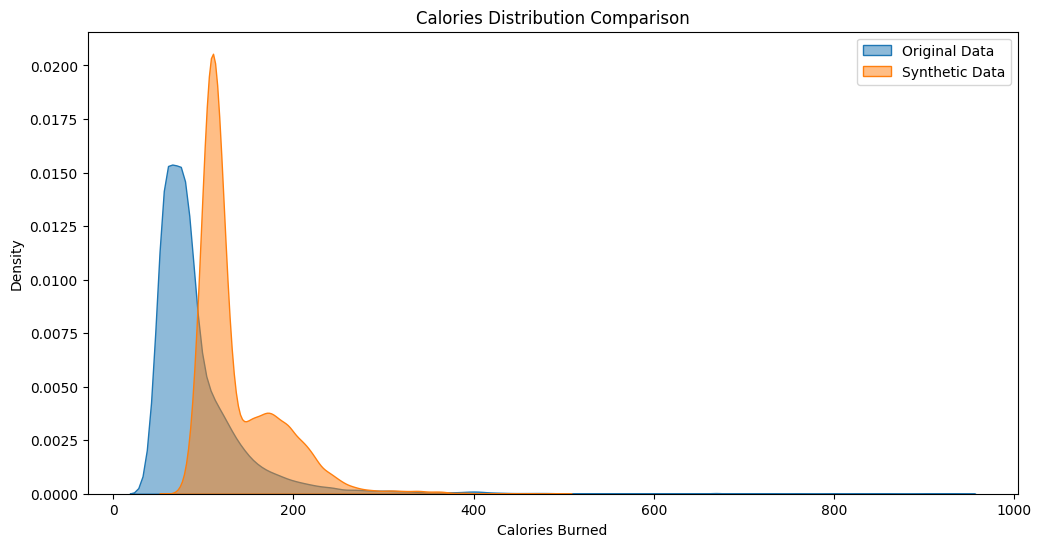

Original Unique IDs: 34
Synthetic Unique IDs: 34

Original ID Distribution:
 Id
1927972279    755
2022484408    755
2320127002    755
1624580081    755
4558609924    754
Name: count, dtype: int64

Synthetic ID Distribution:
 Id
99990005    755
99990006    755
99990008    755
99990002    755
99990018    754
Name: count, dtype: int64


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Identify Key Columns
time_col = 'ActivityHour'
value_col = 'Calories'

# Step 2: Count Unique IDs and Their Row Counts
id_counts = hourlyCalories_df['Id'].value_counts().reset_index()
id_counts.columns = ['Id', 'Row_Count']

# Step 3: Generate New IDs to Match the Original Count
unique_ids = hourlyCalories_df['Id'].unique()
synthetic_ids = np.arange(99990001, 99990001 + len(unique_ids))

# Step 4: Generate Synthetic Calorie Data
synthetic_calories_data = pd.DataFrame()

# Step 5: Advanced Data Generation for Realism
for idx, original_id in enumerate(unique_ids):
    # Identify the number of rows required for this participant
    num_rows = id_counts.loc[id_counts['Id'] == original_id, 'Row_Count'].values[0]

    # Extract original timestamps for alignment
    original_timestamps = hourlyCalories_df[hourlyCalories_df['Id'] == original_id][time_col].values

    # Generate synthetic calorie data with controlled distribution
    sampled_rows = pd.DataFrame({time_col: np.tile(original_timestamps, int(np.ceil(num_rows / len(original_timestamps))))[:num_rows]})
    sampled_rows['Id'] = synthetic_ids[idx]

    # Generate calorie values with improved distribution control
    mean_calories, std_calories = hourlyCalories_df[value_col].mean(), hourlyCalories_df[value_col].std()
    sampled_rows[value_col] = np.random.normal(mean_calories, std_calories * 0.4, size=len(sampled_rows)).astype(int)

    # Introduce variability based on time of day
    def generate_calorie_variability(row):
        hour = pd.to_datetime(row[time_col]).hour
        base_value = np.random.normal(100, 10)
        if hour in range(6, 9):     # Morning workout spike
            return base_value + np.random.normal(100, 30)
        elif hour in range(12, 14): # Afternoon peak (active hours)
            return base_value + np.random.normal(50, 20)
        elif hour in range(18, 20): # Evening workout spike
            return base_value + np.random.normal(80, 25)
        else:                       # Late night/resting periods
            return base_value + np.random.normal(10, 5)

    sampled_rows[value_col] = sampled_rows.apply(generate_calorie_variability, axis=1)

    # Introduce occasional spikes for intense workout sessions
    spike_indices = np.random.choice(sampled_rows.index, size=int(0.1 * len(sampled_rows)), replace=False)
    sampled_rows.loc[spike_indices, value_col] *= np.random.uniform(1.2, 1.8)

    # Clip values to ensure calories stay within realistic range
    sampled_rows[value_col] = sampled_rows[value_col].clip(lower=50, upper=600)

    synthetic_calories_data = pd.concat([synthetic_calories_data, sampled_rows], ignore_index=True)

synthetic_calories_data.sort_values(by=['Id', time_col], inplace=True)

print(f"Synthetic Hourly Calories Data Created: {synthetic_calories_data.shape[0]} rows")
print(synthetic_calories_data.head())

# Visualization to Compare Original vs Synthetic Data
plt.figure(figsize=(12, 6))
sns.kdeplot(hourlyCalories_df[value_col], label='Original Data', fill=True, alpha=0.5)
sns.kdeplot(synthetic_calories_data[value_col], label='Synthetic Data', fill=True, alpha=0.5)
plt.title('Calories Distribution Comparison')
plt.xlabel('Calories Burned')
plt.legend()
plt.show()

# Step 6: Validate Results
print(f"Original Unique IDs: {hourlyCalories_df['Id'].nunique()}")
print(f"Synthetic Unique IDs: {synthetic_calories_data['Id'].nunique()}")
print("\nOriginal ID Distribution:\n", hourlyCalories_df['Id'].value_counts().head())
print("\nSynthetic ID Distribution:\n", synthetic_calories_data['Id'].value_counts().head())


In [62]:
# Count unique IDs and total rows in the original dataset
original_id_count = hourlyCalories_df['Id'].nunique()
original_row_count = hourlyCalories_df.shape[0]

# Count unique IDs and total rows in the synthetic dataset
synthetic_id_count = synthetic_calories_data['Id'].nunique()
synthetic_row_count = synthetic_calories_data.shape[0]

print(f"Original Data - Unique IDs: {original_id_count}, Total Rows: {original_row_count}")
print(f"Synthetic Data - Unique IDs: {synthetic_id_count}, Total Rows: {synthetic_row_count}")

# Optional: Display count of rows per ID for deeper insights
original_id_distribution = hourlyCalories_df['Id'].value_counts()
synthetic_id_distribution = synthetic_calories_data['Id'].value_counts()

print("\nOriginal Data - Rows per ID:")
print(original_id_distribution)

print("\nSynthetic Data - Rows per ID:")
print(synthetic_id_distribution)


Original Data - Unique IDs: 34, Total Rows: 24084
Synthetic Data - Unique IDs: 34, Total Rows: 24084

Original Data - Rows per ID:
Id
1927972279    755
2022484408    755
2320127002    755
1624580081    755
4558609924    754
4445114986    754
8792009665    754
8378563200    754
2026352035    754
8053475328    754
6962181067    754
8877689391    753
7086361926    752
7007744171    752
5553957443    752
1844505072    751
2347167796    751
4057192912    750
4020332650    749
3977333714    747
1503960366    744
4702921684    742
2873212765    740
8253242879    740
5577150313    730
3372868164    711
1644430081    700
6117666160    695
6775888955    682
6391747486    675
4319703577    671
8583815059    666
6290855005    521
2891001357     12
Name: count, dtype: int64

Synthetic Data - Rows per ID:
Id
99990005    755
99990006    755
99990008    755
99990002    755
99990018    754
99990017    754
99990033    754
99990031    754
99990007    754
99990029    754
99990026    754
99990034    753
99

In [63]:
hourlyIntensities_df

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,3/12/2016 12:00:00 AM,0,0.000000
1,1503960366,3/12/2016 1:00:00 AM,0,0.000000
2,1503960366,3/12/2016 2:00:00 AM,0,0.000000
3,1503960366,3/12/2016 3:00:00 AM,0,0.000000
4,1503960366,3/12/2016 4:00:00 AM,0,0.000000
...,...,...,...,...
24079,8877689391,4/12/2016 4:00:00 AM,0,0.000000
24080,8877689391,4/12/2016 5:00:00 AM,0,0.000000
24081,8877689391,4/12/2016 6:00:00 AM,7,0.116667
24082,8877689391,4/12/2016 7:00:00 AM,26,0.433333


Synthetic Hourly Intensity Data Created: 24084 rows
             ActivityHour        Id  TotalIntensity
10  3/12/2016 10:00:00 AM  99990001       38.833241
22  3/12/2016 10:00:00 PM  99990001       53.392479
11  3/12/2016 11:00:00 AM  99990001       46.202330
23  3/12/2016 11:00:00 PM  99990001       65.480873
0   3/12/2016 12:00:00 AM  99990001       46.342574


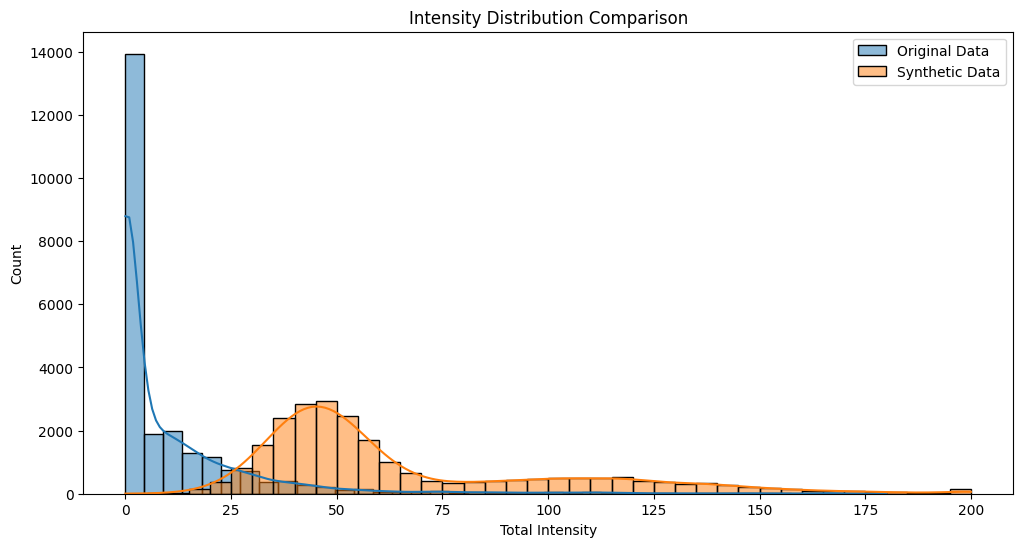

Original Unique IDs: 34
Synthetic Unique IDs: 34

Original ID Distribution:
 Id
1927972279    755
2022484408    755
2320127002    755
1624580081    755
4558609924    754
Name: count, dtype: int64

Synthetic ID Distribution:
 Id
99990005    755
99990006    755
99990008    755
99990002    755
99990018    754
Name: count, dtype: int64


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Identify Key Columns
time_col = 'ActivityHour'
intensity_col = 'TotalIntensity'

# Step 2: Count Unique IDs and Their Row Counts
id_counts = hourlyIntensities_df['Id'].value_counts().reset_index()
id_counts.columns = ['Id', 'Row_Count']

# Step 3: Generate New IDs to Match the Original Count
unique_ids = hourlyIntensities_df['Id'].unique()
synthetic_ids = np.arange(99990001, 99990001 + len(unique_ids))

# Step 4: Generate Synthetic Intensity Data
synthetic_intensity_data = pd.DataFrame()

# Step 5: Advanced Data Generation for Realism
for idx, original_id in enumerate(unique_ids):
    # Identify the number of rows required for this participant
    num_rows = id_counts.loc[id_counts['Id'] == original_id, 'Row_Count'].values[0]

    # Extract original timestamps for alignment
    original_timestamps = hourlyIntensities_df[hourlyIntensities_df['Id'] == original_id][time_col].values

    # Generate synthetic intensity data with controlled distribution
    sampled_rows = pd.DataFrame({time_col: np.tile(original_timestamps, int(np.ceil(num_rows / len(original_timestamps))))[:num_rows]})
    sampled_rows['Id'] = synthetic_ids[idx]

    # Generate intensity values with improved distribution control
    mean_intensity, std_intensity = hourlyIntensities_df[intensity_col].mean(), hourlyIntensities_df[intensity_col].std()
    sampled_rows[intensity_col] = np.random.normal(mean_intensity * 0.9, std_intensity * 0.5, size=len(sampled_rows)).astype(int)

    # Introduce variability based on time of day with improved low-intensity periods
    def generate_intensity_variability(row):
        hour = pd.to_datetime(row[time_col]).hour
        base_value = np.random.normal(40, 10)  # Lower baseline to favor resting/idle periods
        if hour in range(6, 9):    # Morning workout spike
            return base_value + np.random.normal(80, 30)
        elif hour in range(12, 14): # Afternoon active period
            return base_value + np.random.normal(60, 20)
        elif hour in range(18, 20): # Evening workout spike
            return base_value + np.random.normal(70, 25)
        else:                       # Late night/rest periods
            return base_value + np.random.normal(5, 5)

    sampled_rows[intensity_col] = sampled_rows.apply(generate_intensity_variability, axis=1)

    # Introduce occasional spikes for intense workout sessions
    spike_indices = np.random.choice(sampled_rows.index, size=int(0.05 * len(sampled_rows)), replace=False)
    sampled_rows.loc[spike_indices, intensity_col] *= np.random.uniform(1.3, 1.8)

    # Clip values for realistic intensity range
    sampled_rows[intensity_col] = sampled_rows[intensity_col].clip(lower=0, upper=200)

    synthetic_intensity_data = pd.concat([synthetic_intensity_data, sampled_rows], ignore_index=True)

synthetic_intensity_data.sort_values(by=['Id', time_col], inplace=True)

print(f"Synthetic Hourly Intensity Data Created: {synthetic_intensity_data.shape[0]} rows")
print(synthetic_intensity_data.head())

# Visualization to Compare Original vs Synthetic Data
plt.figure(figsize=(12, 6))
sns.histplot(hourlyIntensities_df[intensity_col], kde=True, label='Original Data', alpha=0.5, bins=40)
sns.histplot(synthetic_intensity_data[intensity_col], kde=True, label='Synthetic Data', alpha=0.5, bins=40)
plt.title('Intensity Distribution Comparison')
plt.xlabel('Total Intensity')
plt.legend()
plt.show()

# Step 6: Validate Results
print(f"Original Unique IDs: {hourlyIntensities_df['Id'].nunique()}")
print(f"Synthetic Unique IDs: {synthetic_intensity_data['Id'].nunique()}")
print("\nOriginal ID Distribution:\n", hourlyIntensities_df['Id'].value_counts().head())
print("\nSynthetic ID Distribution:\n", synthetic_intensity_data['Id'].value_counts().head())


In [65]:
# Count unique IDs and total rows in the original dataset
original_id_count = hourlyIntensities_df['Id'].nunique()
original_row_count = hourlyIntensities_df.shape[0]

# Count unique IDs and total rows in the synthetic dataset
synthetic_id_count = synthetic_intensity_data['Id'].nunique()
synthetic_row_count = synthetic_intensity_data.shape[0]

print(f"Original Data - Unique IDs: {original_id_count}, Total Rows: {original_row_count}")
print(f"Synthetic Data - Unique IDs: {synthetic_id_count}, Total Rows: {synthetic_row_count}")

# Display count of rows per ID for deeper insights
original_id_distribution = hourlyIntensities_df['Id'].value_counts()
synthetic_id_distribution = synthetic_intensity_data['Id'].value_counts()

print("\nOriginal Data - Rows per ID:")
print(original_id_distribution)

print("\nSynthetic Data - Rows per ID:")
print(synthetic_id_distribution)


Original Data - Unique IDs: 34, Total Rows: 24084
Synthetic Data - Unique IDs: 34, Total Rows: 24084

Original Data - Rows per ID:
Id
1927972279    755
2022484408    755
2320127002    755
1624580081    755
4558609924    754
4445114986    754
8792009665    754
8378563200    754
2026352035    754
8053475328    754
6962181067    754
8877689391    753
7086361926    752
7007744171    752
5553957443    752
1844505072    751
2347167796    751
4057192912    750
4020332650    749
3977333714    747
1503960366    744
4702921684    742
2873212765    740
8253242879    740
5577150313    730
3372868164    711
1644430081    700
6117666160    695
6775888955    682
6391747486    675
4319703577    671
8583815059    666
6290855005    521
2891001357     12
Name: count, dtype: int64

Synthetic Data - Rows per ID:
Id
99990005    755
99990006    755
99990008    755
99990002    755
99990018    754
99990017    754
99990033    754
99990031    754
99990007    754
99990029    754
99990026    754
99990034    753
99

In [66]:
hourlySteps_df

,Id,ActivityHour,StepTotal
0,1503960366,3/12/2016 12:00:00 AM,0
1,1503960366,3/12/2016 1:00:00 AM,0
2,1503960366,3/12/2016 2:00:00 AM,0
3,1503960366,3/12/2016 3:00:00 AM,0
4,1503960366,3/12/2016 4:00:00 AM,0
...,...,...,...
24079,8877689391,4/12/2016 4:00:00 AM,0
24080,8877689391,4/12/2016 5:00:00 AM,0
24081,8877689391,4/12/2016 6:00:00 AM,209
24082,8877689391,4/12/2016 7:00:00 AM,964


Synthetic Hourly Steps Data Created: 24084 rows
             ActivityHour        Id   StepTotal
10  3/12/2016 10:00:00 AM  99990001  144.700518
22  3/12/2016 10:00:00 PM  99990001  215.319163
11  3/12/2016 11:00:00 AM  99990001   59.955131
23  3/12/2016 11:00:00 PM  99990001   76.772759
0   3/12/2016 12:00:00 AM  99990001   30.310829


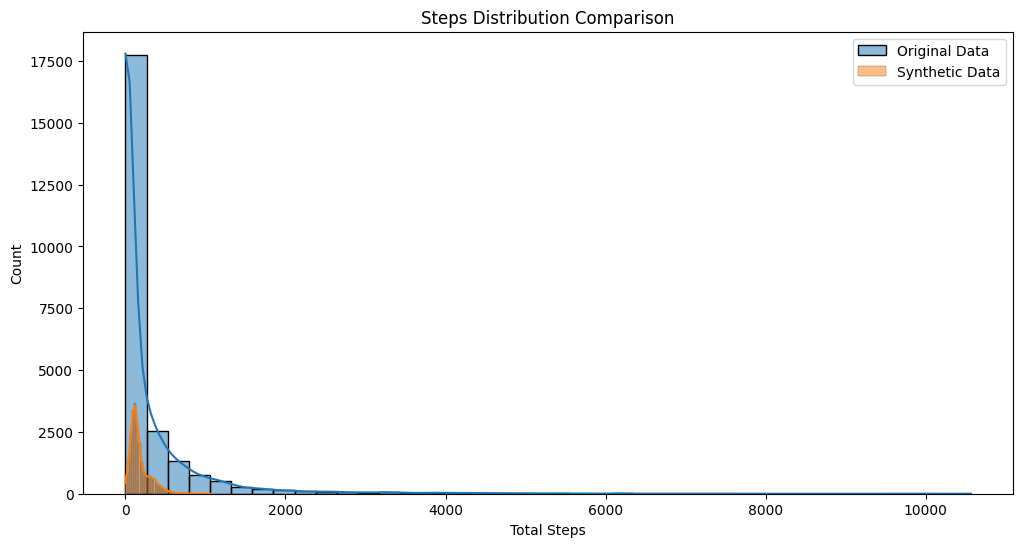

Original Unique IDs: 34
Synthetic Unique IDs: 34

Original ID Distribution:
 Id
1927972279    755
2022484408    755
2320127002    755
1624580081    755
4558609924    754
Name: count, dtype: int64

Synthetic ID Distribution:
 Id
99990005    755
99990006    755
99990008    755
99990002    755
99990018    754
Name: count, dtype: int64


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Identify Key Columns
time_col = 'ActivityHour'
steps_col = 'StepTotal'

# Step 2: Count Unique IDs and Their Row Counts
id_counts = hourlySteps_df['Id'].value_counts().reset_index()
id_counts.columns = ['Id', 'Row_Count']

# Step 3: Generate New IDs to Match the Original Count
unique_ids = hourlySteps_df['Id'].unique()
synthetic_ids = np.arange(99990001, 99990001 + len(unique_ids))

# Step 4: Generate Synthetic Steps Data
synthetic_steps_data = pd.DataFrame()

# Step 5: Advanced Data Generation for Realism
for idx, original_id in enumerate(unique_ids):
    # Identify the number of rows required for this participant
    num_rows = id_counts.loc[id_counts['Id'] == original_id, 'Row_Count'].values[0]

    # Extract original timestamps for alignment
    original_timestamps = hourlySteps_df[hourlySteps_df['Id'] == original_id][time_col].values

    # Generate synthetic steps data with controlled distribution
    sampled_rows = pd.DataFrame({time_col: np.tile(original_timestamps, int(np.ceil(num_rows / len(original_timestamps))))[:num_rows]})
    sampled_rows['Id'] = synthetic_ids[idx]

    # Generate step values with improved distribution control
    mean_steps, std_steps = hourlySteps_df[steps_col].mean(), hourlySteps_df[steps_col].std()
    sampled_rows[steps_col] = np.random.normal(mean_steps, std_steps * 0.4, size=len(sampled_rows)).astype(int)

    # Introduce variability based on time of day with improved patterns
    def generate_steps_variability(row):
        hour = pd.to_datetime(row[time_col]).hour
        base_value = np.random.normal(100, 50)  # Lower baseline for resting periods
        if hour in range(6, 9):    # Morning workout spike
            return base_value + np.random.normal(200, 100)
        elif hour in range(12, 14): # Afternoon active period
            return base_value + np.random.normal(150, 75)
        elif hour in range(18, 20): # Evening workout spike
            return base_value + np.random.normal(250, 100)
        else:                       # Late night/rest periods
            return base_value + np.random.normal(10, 5)

    sampled_rows[steps_col] = sampled_rows.apply(generate_steps_variability, axis=1)

    # Introduce occasional spikes for intense activity
    spike_indices = np.random.choice(sampled_rows.index, size=int(0.1 * len(sampled_rows)), replace=False)
    sampled_rows.loc[spike_indices, steps_col] *= np.random.uniform(1.2, 1.8)

    # Clip values for realistic steps range
    sampled_rows[steps_col] = sampled_rows[steps_col].clip(lower=0, upper=5000)

    synthetic_steps_data = pd.concat([synthetic_steps_data, sampled_rows], ignore_index=True)

synthetic_steps_data.sort_values(by=['Id', time_col], inplace=True)

print(f"Synthetic Hourly Steps Data Created: {synthetic_steps_data.shape[0]} rows")
print(synthetic_steps_data.head())

# Visualization to Compare Original vs Synthetic Data
plt.figure(figsize=(12, 6))
sns.histplot(hourlySteps_df[steps_col], kde=True, label='Original Data', alpha=0.5, bins=40)
sns.histplot(synthetic_steps_data[steps_col], kde=True, label='Synthetic Data', alpha=0.5, bins=40)
plt.title('Steps Distribution Comparison')
plt.xlabel('Total Steps')
plt.legend()
plt.show()

# Step 6: Validate Results
print(f"Original Unique IDs: {hourlySteps_df['Id'].nunique()}")
print(f"Synthetic Unique IDs: {synthetic_steps_data['Id'].nunique()}")
print("\nOriginal ID Distribution:\n", hourlySteps_df['Id'].value_counts().head())
print("\nSynthetic ID Distribution:\n", synthetic_steps_data['Id'].value_counts().head())


In [68]:
minuteCalories_df

,Id,ActivityMinute,Calories
0,1503960366,3/12/2016 12:00:00 AM,0.79730
1,1503960366,3/12/2016 12:01:00 AM,0.79730
2,1503960366,3/12/2016 12:02:00 AM,0.79730
3,1503960366,3/12/2016 12:03:00 AM,0.79730
4,1503960366,3/12/2016 12:04:00 AM,0.79730
...,...,...,...
1445035,8877689391,4/12/2016 8:55:00 AM,1.22480
1445036,8877689391,4/12/2016 8:56:00 AM,1.22480
1445037,8877689391,4/12/2016 8:57:00 AM,1.22480
1445038,8877689391,4/12/2016 8:58:00 AM,1.34728


Synthetic Minute-Level Calories Data Created: 1445040 rows
             ActivityMinute        Id  Calories
600   3/12/2016 10:00:00 AM  99990001  2.557609
1320  3/12/2016 10:00:00 PM  99990001  2.597216
601   3/12/2016 10:01:00 AM  99990001  1.694592
1321  3/12/2016 10:01:00 PM  99990001  2.321467
602   3/12/2016 10:02:00 AM  99990001  2.338545


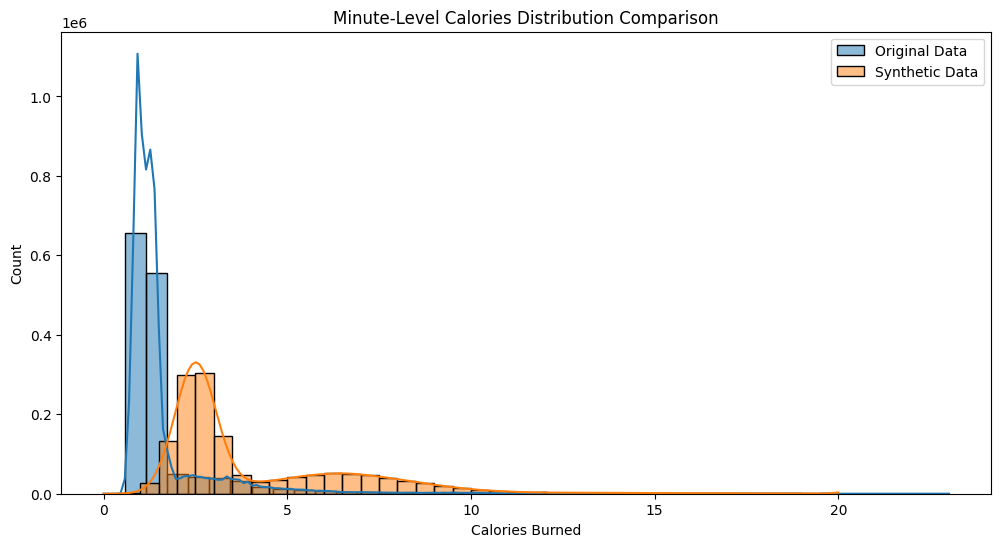

Original Unique IDs: 34
Synthetic Unique IDs: 34

Original ID Distribution:
 Id
1927972279    45300
2022484408    45300
2320127002    45300
1624580081    45300
4558609924    45240
Name: count, dtype: int64

Synthetic ID Distribution:
 Id
99990005    45300
99990006    45300
99990008    45300
99990002    45300
99990018    45240
Name: count, dtype: int64


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Identify Key Columns
time_col = 'ActivityMinute'
calories_col = 'Calories'

# Step 2: Count Unique IDs and Their Row Counts
id_counts = minuteCalories_df['Id'].value_counts().reset_index()
id_counts.columns = ['Id', 'Row_Count']

# Step 3: Generate New IDs to Match the Original Count
unique_ids = minuteCalories_df['Id'].unique()
synthetic_ids = np.arange(99990001, 99990001 + len(unique_ids))

# Step 4: Generate Synthetic Calorie Data
synthetic_minute_calories_data = pd.DataFrame()

# Step 5: Advanced Data Generation for Realism
for idx, original_id in enumerate(unique_ids):
    # Identify the number of rows required for this participant
    num_rows = id_counts.loc[id_counts['Id'] == original_id, 'Row_Count'].values[0]

    # Extract original timestamps for alignment
    original_timestamps = minuteCalories_df[minuteCalories_df['Id'] == original_id][time_col].values

    # Generate synthetic calorie data with controlled distribution
    sampled_rows = pd.DataFrame({time_col: np.tile(original_timestamps, int(np.ceil(num_rows / len(original_timestamps))))[:num_rows]})
    sampled_rows['Id'] = synthetic_ids[idx]

    # Generate calorie values with improved distribution control
    mean_calories, std_calories = minuteCalories_df[calories_col].mean(), minuteCalories_df[calories_col].std()
    sampled_rows[calories_col] = np.random.normal(mean_calories, std_calories * 0.4, size=len(sampled_rows)).astype(int)

    # Introduce variability based on time of day with improved patterns
    def generate_calorie_variability(row):
        hour = pd.to_datetime(row[time_col]).hour
        base_value = np.random.normal(2, 0.5)  # Lower baseline for resting periods
        if hour in range(6, 9):    # Morning workout spike
            return base_value + np.random.normal(5, 1.5)
        elif hour in range(12, 14): # Afternoon active period
            return base_value + np.random.normal(4, 1)
        elif hour in range(18, 20): # Evening workout spike
            return base_value + np.random.normal(6, 1.5)
        else:                       # Late night/rest periods
            return base_value + np.random.normal(0.5, 0.2)

    sampled_rows[calories_col] = sampled_rows.apply(generate_calorie_variability, axis=1)

    # Introduce occasional spikes for intense activity
    spike_indices = np.random.choice(sampled_rows.index, size=int(0.1 * len(sampled_rows)), replace=False)
    sampled_rows.loc[spike_indices, calories_col] *= np.random.uniform(1.5, 2.5)

    # Clip values for realistic calorie range
    sampled_rows[calories_col] = sampled_rows[calories_col].clip(lower=0, upper=20)

    synthetic_minute_calories_data = pd.concat([synthetic_minute_calories_data, sampled_rows], ignore_index=True)

synthetic_minute_calories_data.sort_values(by=['Id', time_col], inplace=True)

print(f"Synthetic Minute-Level Calories Data Created: {synthetic_minute_calories_data.shape[0]} rows")
print(synthetic_minute_calories_data.head())

# Visualization to Compare Original vs Synthetic Data
plt.figure(figsize=(12, 6))
sns.histplot(minuteCalories_df[calories_col], kde=True, label='Original Data', alpha=0.5, bins=40)
sns.histplot(synthetic_minute_calories_data[calories_col], kde=True, label='Synthetic Data', alpha=0.5, bins=40)
plt.title('Minute-Level Calories Distribution Comparison')
plt.xlabel('Calories Burned')
plt.legend()
plt.show()

# Step 6: Validate Results
print(f"Original Unique IDs: {minuteCalories_df['Id'].nunique()}")
print(f"Synthetic Unique IDs: {synthetic_minute_calories_data['Id'].nunique()}")
print("\nOriginal ID Distribution:\n", minuteCalories_df['Id'].value_counts().head())
print("\nSynthetic ID Distribution:\n", synthetic_minute_calories_data['Id'].value_counts().head())


In [70]:
minuteIntensities_df

,Id,ActivityMinute,Intensity
0,1503960366,3/12/2016 12:00:00 AM,0
1,1503960366,3/12/2016 12:01:00 AM,0
2,1503960366,3/12/2016 12:02:00 AM,0
3,1503960366,3/12/2016 12:03:00 AM,0
4,1503960366,3/12/2016 12:04:00 AM,0
...,...,...,...
1445035,8877689391,4/12/2016 8:55:00 AM,0
1445036,8877689391,4/12/2016 8:56:00 AM,0
1445037,8877689391,4/12/2016 8:57:00 AM,0
1445038,8877689391,4/12/2016 8:58:00 AM,0


Synthetic Minute-Level Intensity Data Created: 1445040 rows
             ActivityMinute        Id  Intensity
600   3/12/2016 10:00:00 AM  99990001  14.204298
1320  3/12/2016 10:00:00 PM  99990001   9.707251
601   3/12/2016 10:01:00 AM  99990001  23.740255
1321  3/12/2016 10:01:00 PM  99990001  15.639385
602   3/12/2016 10:02:00 AM  99990001   0.207800


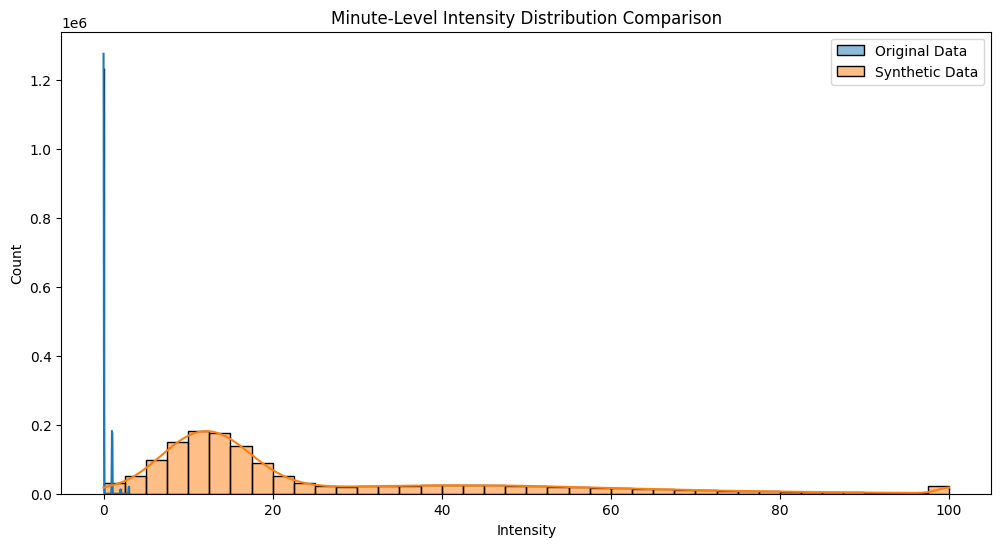

Original Unique IDs: 34
Synthetic Unique IDs: 34

Original ID Distribution:
 Id
1927972279    45300
2022484408    45300
2320127002    45300
1624580081    45300
4558609924    45240
Name: count, dtype: int64

Synthetic ID Distribution:
 Id
99990005    45300
99990006    45300
99990008    45300
99990002    45300
99990018    45240
Name: count, dtype: int64


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Identify Key Columns
time_col = 'ActivityMinute'
intensity_col = 'Intensity'

# Step 2: Count Unique IDs and Their Row Counts
id_counts = minuteIntensities_df['Id'].value_counts().reset_index()
id_counts.columns = ['Id', 'Row_Count']

# Step 3: Generate New IDs to Match the Original Count
unique_ids = minuteIntensities_df['Id'].unique()
synthetic_ids = np.arange(99990001, 99990001 + len(unique_ids))

# Step 4: Generate Synthetic Intensity Data
synthetic_minute_intensity_data = pd.DataFrame()

# Step 5: Advanced Data Generation for Realism
for idx, original_id in enumerate(unique_ids):
    # Identify the number of rows required for this participant
    num_rows = id_counts.loc[id_counts['Id'] == original_id, 'Row_Count'].values[0]

    # Extract original timestamps for alignment
    original_timestamps = minuteIntensities_df[minuteIntensities_df['Id'] == original_id][time_col].values

    # Generate synthetic intensity data with controlled distribution
    sampled_rows = pd.DataFrame({time_col: np.tile(original_timestamps, int(np.ceil(num_rows / len(original_timestamps))))[:num_rows]})
    sampled_rows['Id'] = synthetic_ids[idx]

    # Generate intensity values with improved distribution control
    mean_intensity, std_intensity = minuteIntensities_df[intensity_col].mean(), minuteIntensities_df[intensity_col].std()
    sampled_rows[intensity_col] = np.random.normal(mean_intensity, std_intensity * 0.4, size=len(sampled_rows)).astype(int)

    # Introduce variability based on time of day with improved patterns
    def generate_intensity_variability(row):
        hour = pd.to_datetime(row[time_col]).hour
        base_value = np.random.normal(10, 5)  # Lower baseline for resting periods
        if hour in range(6, 9):    # Morning workout spike
            return base_value + np.random.normal(40, 15)
        elif hour in range(12, 14): # Afternoon active period
            return base_value + np.random.normal(30, 10)
        elif hour in range(18, 20): # Evening workout spike
            return base_value + np.random.normal(50, 20)
        else:                       # Late night/rest periods
            return base_value + np.random.normal(2, 1)

    sampled_rows[intensity_col] = sampled_rows.apply(generate_intensity_variability, axis=1)

    # Introduce occasional spikes for intense activity
    spike_indices = np.random.choice(sampled_rows.index, size=int(0.1 * len(sampled_rows)), replace=False)
    sampled_rows.loc[spike_indices, intensity_col] *= np.random.uniform(1.5, 2.5)

    # Clip values for realistic intensity range
    sampled_rows[intensity_col] = sampled_rows[intensity_col].clip(lower=0, upper=100)

    synthetic_minute_intensity_data = pd.concat([synthetic_minute_intensity_data, sampled_rows], ignore_index=True)

synthetic_minute_intensity_data.sort_values(by=['Id', time_col], inplace=True)

print(f"Synthetic Minute-Level Intensity Data Created: {synthetic_minute_intensity_data.shape[0]} rows")
print(synthetic_minute_intensity_data.head())

# Visualization to Compare Original vs Synthetic Data
plt.figure(figsize=(12, 6))
sns.histplot(minuteIntensities_df[intensity_col], kde=True, label='Original Data', alpha=0.5, bins=40)
sns.histplot(synthetic_minute_intensity_data[intensity_col], kde=True, label='Synthetic Data', alpha=0.5, bins=40)
plt.title('Minute-Level Intensity Distribution Comparison')
plt.xlabel('Intensity')
plt.legend()
plt.show()

# Step 6: Validate Results
print(f"Original Unique IDs: {minuteIntensities_df['Id'].nunique()}")
print(f"Synthetic Unique IDs: {synthetic_minute_intensity_data['Id'].nunique()}")
print("\nOriginal ID Distribution:\n", minuteIntensities_df['Id'].value_counts().head())
print("\nSynthetic ID Distribution:\n", synthetic_minute_intensity_data['Id'].value_counts().head())


In [72]:
minuteMETs_df

,Id,ActivityMinute,METs
0,1503960366,3/12/2016 12:00:00 AM,10
1,1503960366,3/12/2016 12:01:00 AM,10
2,1503960366,3/12/2016 12:02:00 AM,10
3,1503960366,3/12/2016 12:03:00 AM,10
4,1503960366,3/12/2016 12:04:00 AM,10
...,...,...,...
1445035,8877689391,4/12/2016 8:55:00 AM,10
1445036,8877689391,4/12/2016 8:56:00 AM,10
1445037,8877689391,4/12/2016 8:57:00 AM,10
1445038,8877689391,4/12/2016 8:58:00 AM,11


Synthetic Minute-Level METs Data Created: 1445040 rows
             ActivityMinute        Id      METs
600   3/12/2016 10:00:00 AM  99990001  4.950455
1320  3/12/2016 10:00:00 PM  99990001  2.413108
601   3/12/2016 10:01:00 AM  99990001  1.122964
1321  3/12/2016 10:01:00 PM  99990001  2.122822
602   3/12/2016 10:02:00 AM  99990001  2.579293


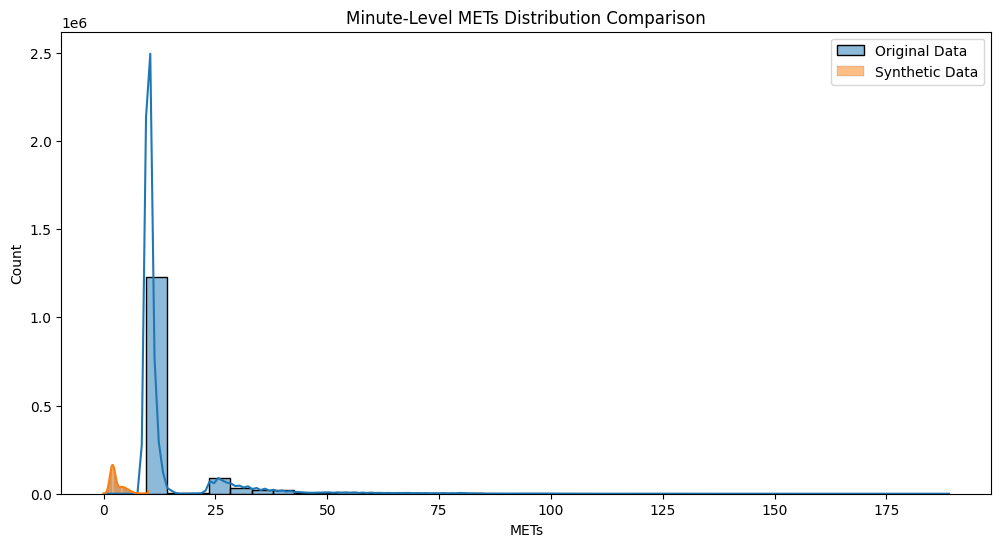

Original Unique IDs: 34
Synthetic Unique IDs: 34

Original ID Distribution:
 Id
1927972279    45300
2022484408    45300
2320127002    45300
1624580081    45300
4558609924    45240
Name: count, dtype: int64

Synthetic ID Distribution:
 Id
99990005    45300
99990006    45300
99990008    45300
99990002    45300
99990018    45240
Name: count, dtype: int64


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Identify Key Columns
time_col = 'ActivityMinute'
mets_col = 'METs'

# Step 2: Count Unique IDs and Their Row Counts
id_counts = minuteMETs_df['Id'].value_counts().reset_index()
id_counts.columns = ['Id', 'Row_Count']

# Step 3: Generate New IDs to Match the Original Count
unique_ids = minuteMETs_df['Id'].unique()
synthetic_ids = np.arange(99990001, 99990001 + len(unique_ids))

# Step 4: Generate Synthetic METs Data
synthetic_minute_mets_data = pd.DataFrame()

# Step 5: Advanced Data Generation for Realism
for idx, original_id in enumerate(unique_ids):
    # Identify the number of rows required for this participant
    num_rows = id_counts.loc[id_counts['Id'] == original_id, 'Row_Count'].values[0]

    # Extract original timestamps for alignment
    original_timestamps = minuteMETs_df[minuteMETs_df['Id'] == original_id][time_col].values

    # Generate synthetic METs data with controlled distribution
    sampled_rows = pd.DataFrame({time_col: np.tile(original_timestamps, int(np.ceil(num_rows / len(original_timestamps))))[:num_rows]})
    sampled_rows['Id'] = synthetic_ids[idx]

    # Generate METs values with improved distribution control
    mean_mets, std_mets = minuteMETs_df[mets_col].mean(), minuteMETs_df[mets_col].std()
    sampled_rows[mets_col] = np.random.normal(mean_mets, std_mets * 0.4, size=len(sampled_rows)).astype(float)

    # Introduce variability based on time of day with improved patterns
    def generate_mets_variability(row):
        hour = pd.to_datetime(row[time_col]).hour
        base_value = np.random.normal(1.5, 0.5)  # Lower baseline for resting periods
        if hour in range(6, 9):    # Morning workout spike
            return base_value + np.random.normal(3, 1)
        elif hour in range(12, 14): # Afternoon active period
            return base_value + np.random.normal(2, 0.8)
        elif hour in range(18, 20): # Evening workout spike
            return base_value + np.random.normal(3.5, 1)
        else:                       # Late night/rest periods
            return base_value + np.random.normal(0.5, 0.3)

    sampled_rows[mets_col] = sampled_rows.apply(generate_mets_variability, axis=1)

    # Introduce occasional spikes for intense activity
    spike_indices = np.random.choice(sampled_rows.index, size=int(0.1 * len(sampled_rows)), replace=False)
    sampled_rows.loc[spike_indices, mets_col] *= np.random.uniform(1.5, 2.5)

    # Clip values for realistic METs range
    sampled_rows[mets_col] = sampled_rows[mets_col].clip(lower=0, upper=10)

    synthetic_minute_mets_data = pd.concat([synthetic_minute_mets_data, sampled_rows], ignore_index=True)

synthetic_minute_mets_data.sort_values(by=['Id', time_col], inplace=True)

print(f"Synthetic Minute-Level METs Data Created: {synthetic_minute_mets_data.shape[0]} rows")
print(synthetic_minute_mets_data.head())

# Visualization to Compare Original vs Synthetic Data
plt.figure(figsize=(12, 6))
sns.histplot(minuteMETs_df[mets_col], kde=True, label='Original Data', alpha=0.5, bins=40)
sns.histplot(synthetic_minute_mets_data[mets_col], kde=True, label='Synthetic Data', alpha=0.5, bins=40)
plt.title('Minute-Level METs Distribution Comparison')
plt.xlabel('METs')
plt.legend()
plt.show()

# Step 6: Validate Results
print(f"Original Unique IDs: {minuteMETs_df['Id'].nunique()}")
print(f"Synthetic Unique IDs: {synthetic_minute_mets_data['Id'].nunique()}")
print("\nOriginal ID Distribution:\n", minuteMETs_df['Id'].value_counts().head())
print("\nSynthetic ID Distribution:\n", synthetic_minute_mets_data['Id'].value_counts().head())


In [74]:
minuteSleep_df

,Id,date,value,logId
0,1503960366,3/13/2016 2:39:30 AM,1,11114919637
1,1503960366,3/13/2016 2:40:30 AM,1,11114919637
2,1503960366,3/13/2016 2:41:30 AM,1,11114919637
3,1503960366,3/13/2016 2:42:30 AM,1,11114919637
4,1503960366,3/13/2016 2:43:30 AM,1,11114919637
...,...,...,...,...
198554,8792009665,4/9/2016 6:38:00 PM,1,11357751881
198555,8792009665,4/9/2016 6:39:00 PM,1,11357751881
198556,8792009665,4/9/2016 6:40:00 PM,1,11357751881
198557,8792009665,4/9/2016 6:41:00 PM,1,11357751881


Synthetic Minute-Level Sleep Data Created: 198559 rows
                   date        Id  value
0  3/13/2016 2:39:30 AM  99990001      0
1  3/13/2016 2:40:30 AM  99990001      2
2  3/13/2016 2:41:30 AM  99990001      2
3  3/13/2016 2:42:30 AM  99990001      2
4  3/13/2016 2:43:30 AM  99990001      2


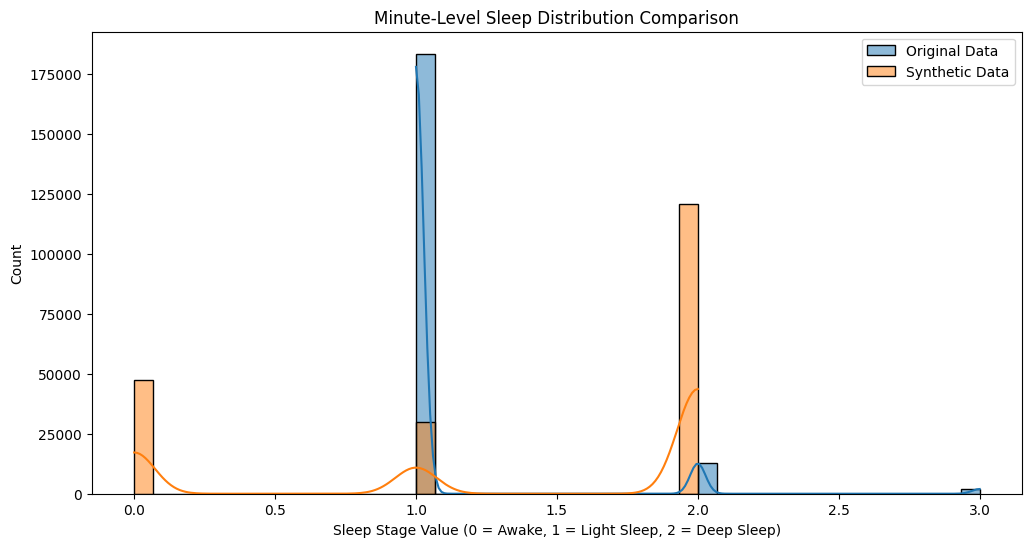

Original Unique IDs: 23
Synthetic Unique IDs: 23

Original ID Distribution:
 Id
2026352035    17504
8378563200    15111
6962181067    14903
5553957443    14602
5577150313    13885
Name: count, dtype: int64

Synthetic ID Distribution:
 Id
99990006    17504
99990022    15111
99990018    14903
99990014    14602
99990015    13885
Name: count, dtype: int64


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Identify Key Columns
time_col = 'date'
sleep_col = 'value'

# Step 2: Count Unique IDs and Their Row Counts
id_counts = minuteSleep_df['Id'].value_counts().reset_index()
id_counts.columns = ['Id', 'Row_Count']

# Step 3: Generate New IDs to Match the Original Count
unique_ids = minuteSleep_df['Id'].unique()
synthetic_ids = np.arange(99990001, 99990001 + len(unique_ids))

# Step 4: Generate Synthetic Sleep Data
synthetic_minute_sleep_data = pd.DataFrame()

# Step 5: Advanced Data Generation for Realism
for idx, original_id in enumerate(unique_ids):
    # Identify the number of rows required for this participant
    num_rows = id_counts.loc[id_counts['Id'] == original_id, 'Row_Count'].values[0]

    # Extract original timestamps for alignment
    original_timestamps = minuteSleep_df[minuteSleep_df['Id'] == original_id][time_col].values

    # Generate synthetic sleep data with controlled distribution
    sampled_rows = pd.DataFrame({time_col: np.tile(original_timestamps, int(np.ceil(num_rows / len(original_timestamps))))[:num_rows]})
    sampled_rows['Id'] = synthetic_ids[idx]

    # Generate sleep values with improved distribution control
    mean_sleep, std_sleep = minuteSleep_df[sleep_col].mean(), minuteSleep_df[sleep_col].std()
    sampled_rows[sleep_col] = np.random.normal(mean_sleep, std_sleep * 0.4, size=len(sampled_rows)).astype(int)

    # Introduce variability for sleep cycles (awake/light/deep stages)
    def generate_sleep_variability(row):
        hour = pd.to_datetime(row[time_col]).hour
        base_value = np.random.choice([0, 1])  # 0 for awake, 1 for asleep baseline
        if hour in range(22, 24) or hour in range(0, 5):   # Deep sleep period
            return base_value + np.random.choice([1, 2], p=[0.3, 0.7])  # Higher chance of deep sleep
        elif hour in range(5, 7) or hour in range(20, 22):  # Light sleep period
            return base_value + np.random.choice([1, 2], p=[0.7, 0.3])  # Higher chance of light sleep
        else:  # Active/wake hours
            return 0  # Awake

    sampled_rows[sleep_col] = sampled_rows.apply(generate_sleep_variability, axis=1)

    # Introduce occasional wake periods
    wake_indices = np.random.choice(sampled_rows.index, size=int(0.1 * len(sampled_rows)), replace=False)
    sampled_rows.loc[wake_indices, sleep_col] = 0  # Force awake values during random intervals

    # Clip values to ensure valid sleep stages
    sampled_rows[sleep_col] = sampled_rows[sleep_col].clip(lower=0, upper=2)

    synthetic_minute_sleep_data = pd.concat([synthetic_minute_sleep_data, sampled_rows], ignore_index=True)

synthetic_minute_sleep_data.sort_values(by=['Id', time_col], inplace=True)

print(f"Synthetic Minute-Level Sleep Data Created: {synthetic_minute_sleep_data.shape[0]} rows")
print(synthetic_minute_sleep_data.head())

# Visualization to Compare Original vs Synthetic Data
plt.figure(figsize=(12, 6))
sns.histplot(minuteSleep_df[sleep_col], kde=True, label='Original Data', alpha=0.5, bins=30)
sns.histplot(synthetic_minute_sleep_data[sleep_col], kde=True, label='Synthetic Data', alpha=0.5, bins=30)
plt.title('Minute-Level Sleep Distribution Comparison')
plt.xlabel('Sleep Stage Value (0 = Awake, 1 = Light Sleep, 2 = Deep Sleep)')
plt.legend()
plt.show()

# Step 6: Validate Results
print(f"Original Unique IDs: {minuteSleep_df['Id'].nunique()}")
print(f"Synthetic Unique IDs: {synthetic_minute_sleep_data['Id'].nunique()}")
print("\nOriginal ID Distribution:\n", minuteSleep_df['Id'].value_counts().head())
print("\nSynthetic ID Distribution:\n", synthetic_minute_sleep_data['Id'].value_counts().head())


In [77]:
minuteSteps_df

,Id,ActivityMinute,Steps
0,1503960366,3/12/2016 12:00:00 AM,0
1,1503960366,3/12/2016 12:01:00 AM,0
2,1503960366,3/12/2016 12:02:00 AM,0
3,1503960366,3/12/2016 12:03:00 AM,0
4,1503960366,3/12/2016 12:04:00 AM,0
...,...,...,...
1445035,8877689391,4/12/2016 8:55:00 AM,0
1445036,8877689391,4/12/2016 8:56:00 AM,0
1445037,8877689391,4/12/2016 8:57:00 AM,0
1445038,8877689391,4/12/2016 8:58:00 AM,0


Synthetic Minute-Level Steps Data Created: 1445040 rows
             ActivityMinute        Id     Steps
600   3/12/2016 10:00:00 AM  99990001  7.326228
1320  3/12/2016 10:00:00 PM  99990001  9.183463
601   3/12/2016 10:01:00 AM  99990001  2.694464
1321  3/12/2016 10:01:00 PM  99990001  3.390616
602   3/12/2016 10:02:00 AM  99990001  4.148871


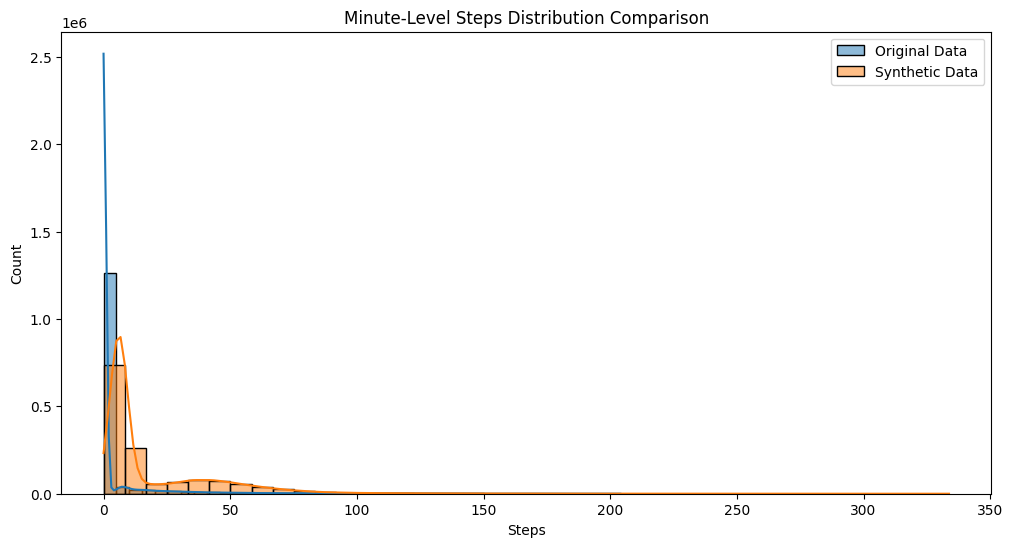

Original Unique IDs: 34
Synthetic Unique IDs: 34

Original ID Distribution:
 Id
1927972279    45300
2022484408    45300
2320127002    45300
1624580081    45300
4558609924    45240
Name: count, dtype: int64

Synthetic ID Distribution:
 Id
99990005    45300
99990006    45300
99990008    45300
99990002    45300
99990018    45240
Name: count, dtype: int64


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Identify Key Columns
time_col = 'ActivityMinute'
steps_col = 'Steps'

# Step 2: Count Unique IDs and Their Row Counts
id_counts = minuteSteps_df['Id'].value_counts().reset_index()
id_counts.columns = ['Id', 'Row_Count']

# Step 3: Generate New IDs to Match the Original Count
unique_ids = minuteSteps_df['Id'].unique()
synthetic_ids = np.arange(99990001, 99990001 + len(unique_ids))

# Step 4: Generate Synthetic Steps Data
synthetic_minute_steps_data = pd.DataFrame()

# Step 5: Advanced Data Generation for Realism
for idx, original_id in enumerate(unique_ids):
    # Identify the number of rows required for this participant
    num_rows = id_counts.loc[id_counts['Id'] == original_id, 'Row_Count'].values[0]

    # Extract original timestamps for alignment
    original_timestamps = minuteSteps_df[minuteSteps_df['Id'] == original_id][time_col].values

    # Generate synthetic steps data with controlled distribution
    sampled_rows = pd.DataFrame({time_col: np.tile(original_timestamps, int(np.ceil(num_rows / len(original_timestamps))))[:num_rows]})
    sampled_rows['Id'] = synthetic_ids[idx]

    # Generate steps values with improved distribution control
    mean_steps, std_steps = minuteSteps_df[steps_col].mean(), minuteSteps_df[steps_col].std()
    sampled_rows[steps_col] = np.random.normal(mean_steps, std_steps * 0.4, size=len(sampled_rows)).astype(int)

    # Introduce variability based on time of day with improved patterns
    def generate_steps_variability(row):
        hour = pd.to_datetime(row[time_col]).hour
        base_value = np.random.normal(5, 3)  # Lower baseline for resting periods
        if hour in range(6, 9):    # Morning workout spike
            return base_value + np.random.normal(40, 15)
        elif hour in range(12, 14): # Afternoon active period
            return base_value + np.random.normal(30, 10)
        elif hour in range(18, 20): # Evening workout spike
            return base_value + np.random.normal(50, 20)
        else:                       # Late night/rest periods
            return base_value + np.random.normal(1, 1)

    sampled_rows[steps_col] = sampled_rows.apply(generate_steps_variability, axis=1)

    # Introduce occasional spikes for intense activity
    spike_indices = np.random.choice(sampled_rows.index, size=int(0.1 * len(sampled_rows)), replace=False)
    sampled_rows.loc[spike_indices, steps_col] *= np.random.uniform(1.5, 3.0)

    # Clip values for realistic step counts
    sampled_rows[steps_col] = sampled_rows[steps_col].clip(lower=0, upper=500)

    synthetic_minute_steps_data = pd.concat([synthetic_minute_steps_data, sampled_rows], ignore_index=True)

synthetic_minute_steps_data.sort_values(by=['Id', time_col], inplace=True)

print(f"Synthetic Minute-Level Steps Data Created: {synthetic_minute_steps_data.shape[0]} rows")
print(synthetic_minute_steps_data.head())

# Visualization to Compare Original vs Synthetic Data
plt.figure(figsize=(12, 6))
sns.histplot(minuteSteps_df[steps_col], kde=True, label='Original Data', alpha=0.5, bins=40)
sns.histplot(synthetic_minute_steps_data[steps_col], kde=True, label='Synthetic Data', alpha=0.5, bins=40)
plt.title('Minute-Level Steps Distribution Comparison')
plt.xlabel('Steps')
plt.legend()
plt.show()

# Step 6: Validate Results
print(f"Original Unique IDs: {minuteSteps_df['Id'].nunique()}")
print(f"Synthetic Unique IDs: {synthetic_minute_steps_data['Id'].nunique()}")
print("\nOriginal ID Distribution:\n", minuteSteps_df['Id'].value_counts().head())
print("\nSynthetic ID Distribution:\n", synthetic_minute_steps_data['Id'].value_counts().head())


In [78]:
weightLog_df

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,4/5/2016 11:59:59 PM,53.299999,117.506384,22.0,22.969999,True,1459900799000
1,1927972279,4/10/2016 6:33:26 PM,129.600006,285.719105,NaN,46.169998,False,1460313206000
2,2347167796,4/3/2016 11:59:59 PM,63.400002,139.773078,10.0,24.770000,True,1459727999000
3,2873212765,4/6/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1459987199000
4,2873212765,4/7/2016 11:59:59 PM,57.200001,126.104416,NaN,21.650000,True,1460073599000
5,2891001357,4/5/2016 11:59:59 PM,88.400002,194.888643,NaN,25.030001,True,1459900799000
6,4445114986,3/30/2016 11:59:59 PM,92.400002,203.707134,NaN,35.009998,True,1459382399000
7,4558609924,4/8/2016 11:59:59 PM,69.400002,153.000813,NaN,27.139999,True,1460159999000
8,4702921684,4/4/2016 11:59:59 PM,99.699997,219.800869,NaN,26.110001,True,1459814399000
9,6962181067,3/30/2016 11:59:59 PM,61.500000,135.584291,NaN,24.030001,True,1459382399000


Synthetic Weight Log Data Created: 33 rows
                   Date        Id   WeightKg  WeightPounds        BMI
0  4/5/2016 11:59:59 PM  99990001  67.302969    148.377471  25.927298
1  4/10/2016 6:33:26 PM  99990002  69.614728    153.474021  26.333126
2  4/3/2016 11:59:59 PM  99990003  72.486500    159.805188  24.691651
3  4/6/2016 11:59:59 PM  99990004  76.819603    169.358033  24.836710
4  4/7/2016 11:59:59 PM  99990004  75.252967    165.904195  26.524188


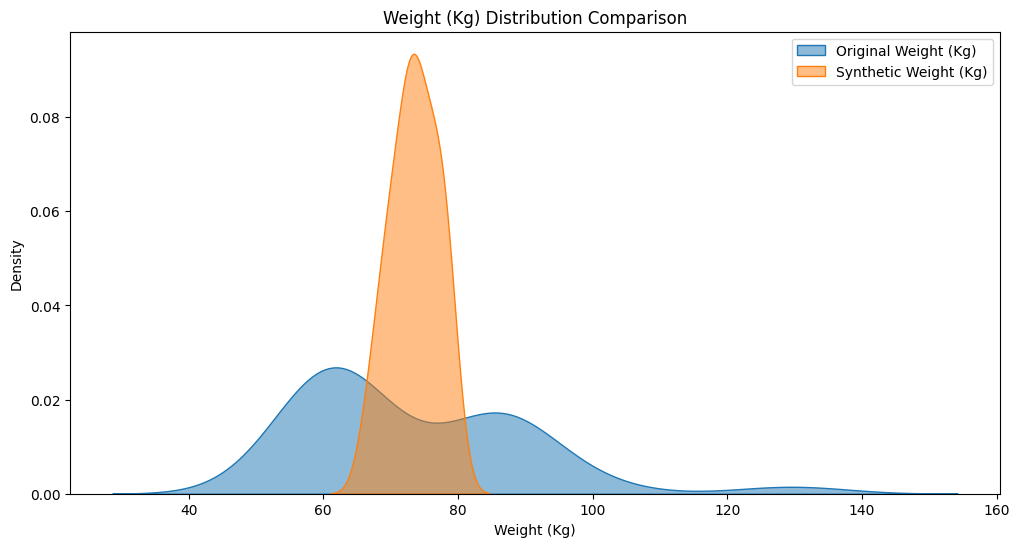

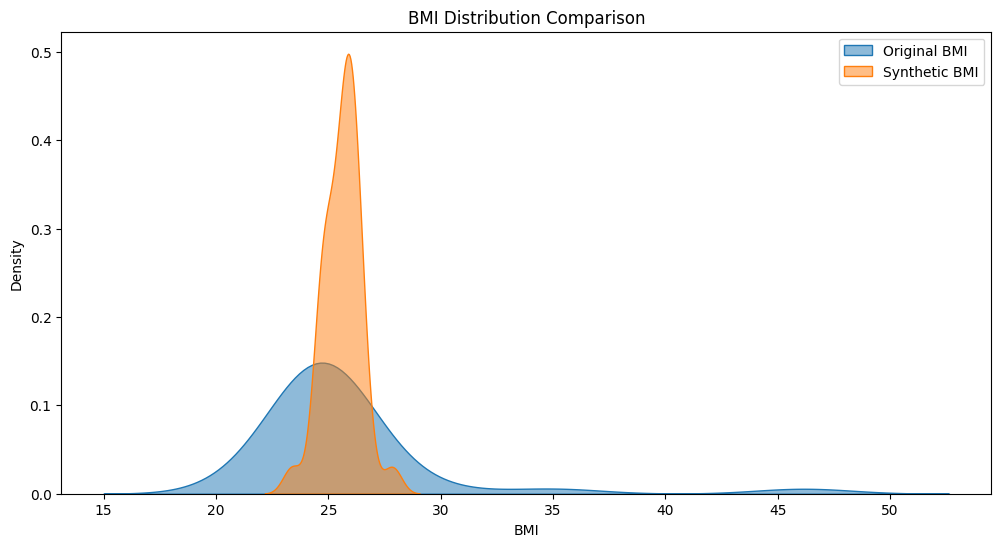

Original Unique IDs: 11
Synthetic Unique IDs: 11

Original ID Distribution:
 Id
6962181067    14
8877689391     9
2873212765     2
1503960366     1
1927972279     1
Name: count, dtype: int64

Synthetic ID Distribution:
 Id
99990009    14
99990011     9
99990004     2
99990001     1
99990002     1
Name: count, dtype: int64


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Identify Key Columns
time_col = 'Date'
weight_kg_col = 'WeightKg'
weight_pounds_col = 'WeightPounds'
bmi_col = 'BMI'

# Step 2: Count Unique IDs and Their Row Counts
id_counts = weightLog_df['Id'].value_counts().reset_index()
id_counts.columns = ['Id', 'Row_Count']

# Step 3: Generate New IDs to Match the Original Count
unique_ids = weightLog_df['Id'].unique()
synthetic_ids = np.arange(99990001, 99990001 + len(unique_ids))

# Step 4: Generate Synthetic Weight Log Data
synthetic_weight_data = pd.DataFrame()

# Step 5: Advanced Data Generation for Realism
for idx, original_id in enumerate(unique_ids):
    # Identify the number of rows required for this participant
    num_rows = id_counts.loc[id_counts['Id'] == original_id, 'Row_Count'].values[0]

    # Extract original timestamps for alignment
    original_timestamps = weightLog_df[weightLog_df['Id'] == original_id][time_col].values

    # Generate synthetic weight data with controlled distribution
    sampled_rows = pd.DataFrame({time_col: np.tile(original_timestamps, int(np.ceil(num_rows / len(original_timestamps))))[:num_rows]})
    sampled_rows['Id'] = synthetic_ids[idx]

    # Generate weight values with improved distribution control
    mean_weight_kg, std_weight_kg = weightLog_df[weight_kg_col].mean(), weightLog_df[weight_kg_col].std()
    sampled_rows[weight_kg_col] = np.random.normal(mean_weight_kg, std_weight_kg * 0.2, size=len(sampled_rows)).astype(float)

    # Convert kg to pounds for consistency
    sampled_rows[weight_pounds_col] = sampled_rows[weight_kg_col] * 2.20462

    # BMI Calculation
    mean_bmi, std_bmi = weightLog_df[bmi_col].mean(), weightLog_df[bmi_col].std()
    sampled_rows[bmi_col] = np.random.normal(mean_bmi, std_bmi * 0.2, size=len(sampled_rows)).astype(float)

    # Clip values to realistic weight and BMI ranges
    sampled_rows[weight_kg_col] = sampled_rows[weight_kg_col].clip(lower=40, upper=150)
    sampled_rows[weight_pounds_col] = sampled_rows[weight_pounds_col].clip(lower=88, upper=330)
    sampled_rows[bmi_col] = sampled_rows[bmi_col].clip(lower=15, upper=40)

    synthetic_weight_data = pd.concat([synthetic_weight_data, sampled_rows], ignore_index=True)

synthetic_weight_data.sort_values(by=['Id', time_col], inplace=True)

print(f"Synthetic Weight Log Data Created: {synthetic_weight_data.shape[0]} rows")
print(synthetic_weight_data.head())

# Visualization to Compare Original vs Synthetic Data
plt.figure(figsize=(12, 6))
sns.kdeplot(weightLog_df[weight_kg_col], label='Original Weight (Kg)', fill=True, alpha=0.5)
sns.kdeplot(synthetic_weight_data[weight_kg_col], label='Synthetic Weight (Kg)', fill=True, alpha=0.5)
plt.title('Weight (Kg) Distribution Comparison')
plt.xlabel('Weight (Kg)')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.kdeplot(weightLog_df[bmi_col], label='Original BMI', fill=True, alpha=0.5)
sns.kdeplot(synthetic_weight_data[bmi_col], label='Synthetic BMI', fill=True, alpha=0.5)
plt.title('BMI Distribution Comparison')
plt.xlabel('BMI')
plt.legend()
plt.show()

# Step 6: Validate Results
print(f"Original Unique IDs: {weightLog_df['Id'].nunique()}")
print(f"Synthetic Unique IDs: {synthetic_weight_data['Id'].nunique()}")
print("\nOriginal ID Distribution:\n", weightLog_df['Id'].value_counts().head())
print("\nSynthetic ID Distribution:\n", synthetic_weight_data['Id'].value_counts().head())


In [84]:
# List of dataframes and corresponding filenames
dataframes = [
    (synthetic_daily_activity_data, "synthetic_dailyActivity.csv"),
    (synthetic_hr_data, "synthetic_heartrate_exact_minute.csv"),
    (synthetic_hourlyCalories_df, "synthetic_hourlyCalories.csv"),
    (synthetic_hourlyIntensities_df, "synthetic_hourlyIntensities.csv"),
    (synthetic_hourlySteps_df, "synthetic_hourlySteps.csv"),
    (synthetic_minuteCalories_df, "synthetic_minuteCalories.csv"),
    (synthetic_minuteIntensities_df, "synthetic_minuteIntensities.csv"),
    (synthetic_minuteMETs_df, "synthetic_minuteMETs.csv"),
    (synthetic_minuteSleep_df, "synthetic_minuteSleep.csv"),
    (synthetic_minuteSteps_df, "synthetic_minuteSteps.csv"),
    (synthetic_weight_data, "synthetic_weightLog.csv")
]

# Save each dataframe to CSV
for df, filename in dataframes:
    df.to_csv(filename, index=False)

print("All synthetic datasets have been successfully saved as CSV files.")


NameError: name 'synthetic_hourlyCalories_df' is not defined

In [86]:
import os

# Step 1: Define the Path
save_path = '/Users/hemanthbodala/Downloads/synthetic_data/'  # Change this path to your desired location

# Step 2: Create the Directory (if it doesn't exist)
os.makedirs(save_path, exist_ok=True)

# Step 3: Define DataFrames and Corresponding Filenames
synthetic_dataframes = {
    'synthetic_weightLog.csv': synthetic_weight_data,
    'synthetic_minuteSteps.csv': synthetic_minute_steps_data,
    'synthetic_minuteSleep.csv': synthetic_minute_sleep_data,
    'synthetic_minuteMETs.csv': synthetic_minute_mets_data,
    'synthetic_minuteIntensities.csv': synthetic_minute_intensity_data,
    'synthetic_minuteCalories.csv': synthetic_minute_calories_data,
    'synthetic_hourlySteps.csv': synthetic_steps_data,
    'synthetic_hourlyIntensities.csv': synthetic_intensity_data,
    'synthetic_hourlyCalories.csv': synthetic_calories_data,
    'synthetic_heartrate.csv': synthetic_hr_data,
    'synthetic_dailyActivity.csv': synthetic_daily_activity_data
}

# Step 4: Save Each DataFrame as a CSV File in the Defined Path
for filename, df in synthetic_dataframes.items():
    df.to_csv(os.path.join(save_path, filename), index=False)
    print(f"Saved: {os.path.join(save_path, filename)}")

print("All synthetic data successfully saved.")


Saved: /Users/hemanthbodala/Downloads/synthetic_data/synthetic_weightLog.csv
Saved: /Users/hemanthbodala/Downloads/synthetic_data/synthetic_minuteSteps.csv
Saved: /Users/hemanthbodala/Downloads/synthetic_data/synthetic_minuteSleep.csv
Saved: /Users/hemanthbodala/Downloads/synthetic_data/synthetic_minuteMETs.csv
Saved: /Users/hemanthbodala/Downloads/synthetic_data/synthetic_minuteIntensities.csv
Saved: /Users/hemanthbodala/Downloads/synthetic_data/synthetic_minuteCalories.csv
Saved: /Users/hemanthbodala/Downloads/synthetic_data/synthetic_hourlySteps.csv
Saved: /Users/hemanthbodala/Downloads/synthetic_data/synthetic_hourlyIntensities.csv
Saved: /Users/hemanthbodala/Downloads/synthetic_data/synthetic_hourlyCalories.csv
Saved: /Users/hemanthbodala/Downloads/synthetic_data/synthetic_heartrate.csv
Saved: /Users/hemanthbodala/Downloads/synthetic_data/synthetic_dailyActivity.csv
All synthetic data successfully saved.


Demographic Data Created with 70 entries.
           Id  Age  Smoking  Drinking
0  8053475328   36        1         1
1  1644430081   49        0         1
2  8378563200   58        1         0
3    99990016   44        1         0
4  4558609924   40        1         0


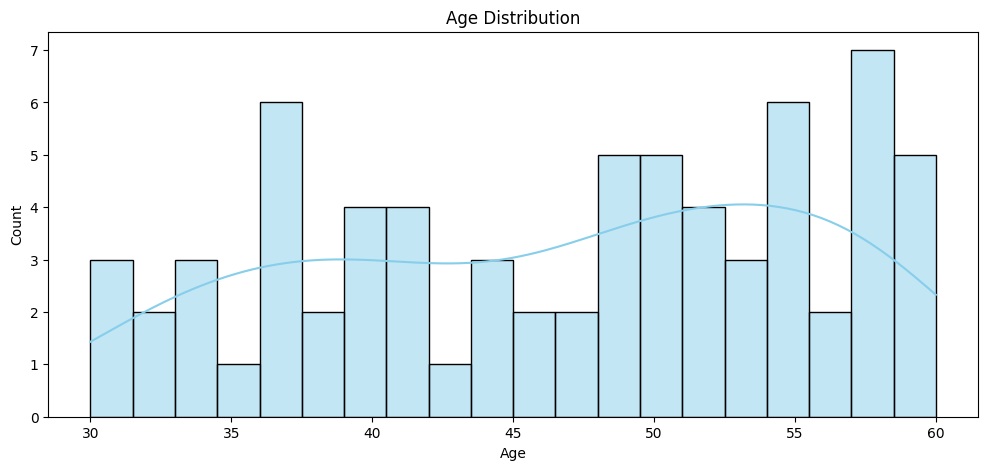

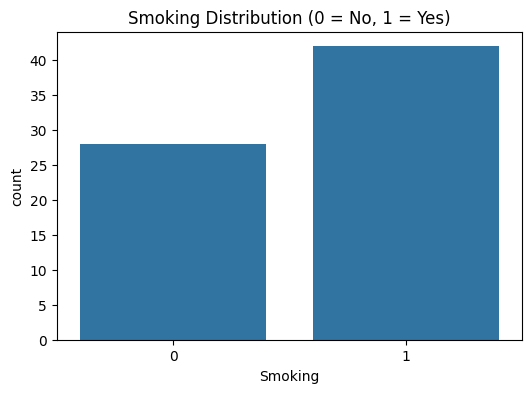

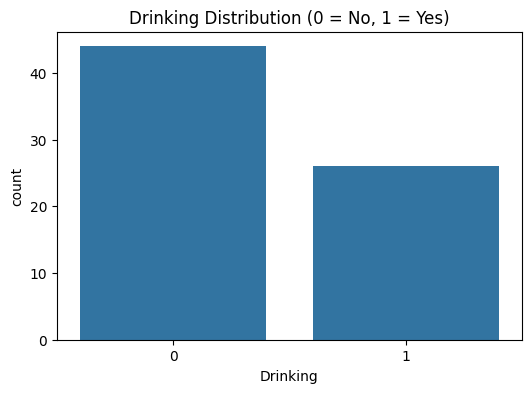

In [87]:
import pandas as pd
import numpy as np

# Step 1: Collect Unique IDs from Original and Synthetic DataFrames
original_ids = set(
    pd.concat([
        dailyActivity_df['Id'],
        heartrate_exact_minute_df['Id'],
        hourlyCalories_df['Id'],
        hourlyIntensities_df['Id'],
        hourlySteps_df['Id'],
        minuteCalories_df['Id'],
        minuteIntensities_df['Id'],
        minuteMETs_df['Id'],
        minuteSleep_df['Id'],
        minuteSteps_df['Id'],
        weightLog_df['Id']
    ]).unique()
)

synthetic_ids = set(
    pd.concat([
        synthetic_daily_activity_data['Id'],
        synthetic_hr_data['Id'],
        synthetic_calories_data['Id'],
        synthetic_intensity_data['Id'],
        synthetic_steps_data['Id'],
        synthetic_minute_calories_data['Id'],
        synthetic_minute_intensity_data['Id'],
        synthetic_minute_mets_data['Id'],
        synthetic_minute_sleep_data['Id'],
        synthetic_minute_steps_data['Id'],
        synthetic_weight_data['Id']
    ]).unique()
)

# Step 2: Combine Unique IDs
all_ids = list(original_ids.union(synthetic_ids))

# Step 3: Generate Demographic Data
np.random.seed(42)  # Ensures reproducibility
demographic_data = pd.DataFrame({
    'Id': all_ids,
    'Age': np.random.randint(30, 61, size=len(all_ids)),        # Age between 30-60
    'Smoking': np.random.choice([0, 1], size=len(all_ids)),     # 0 = No, 1 = Yes
    'Drinking': np.random.choice([0, 1], size=len(all_ids))     # 0 = No, 1 = Yes
})

# Step 4: Save to CSV
demographic_data.to_csv('synthetic_demographic_data.csv', index=False)
print(f"Demographic Data Created with {len(demographic_data)} entries.")
print(demographic_data.head())

# Step 5: Visualizing Demographics
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.histplot(demographic_data['Age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Smoking', data=demographic_data)
plt.title('Smoking Distribution (0 = No, 1 = Yes)')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Drinking', data=demographic_data)
plt.title('Drinking Distribution (0 = No, 1 = Yes)')
plt.show()


In [89]:
import pandas as pd
import numpy as np

# Step 1: Collect Unique IDs from Original and Synthetic DataFrames
original_ids = set(
    pd.concat([
        dailyActivity_df['Id'],
        heartrate_exact_minute_df['Id'],
        hourlyCalories_df['Id'],
        hourlyIntensities_df['Id'],
        hourlySteps_df['Id'],
        minuteCalories_df['Id'],
        minuteIntensities_df['Id'],
        minuteMETs_df['Id'],
        minuteSleep_df['Id'],
        minuteSteps_df['Id'],
        weightLog_df['Id']
    ]).unique()
)

synthetic_ids = set(
    pd.concat([
        synthetic_daily_activity_data['Id'],
        synthetic_hr_data['Id'],
        synthetic_calories_data['Id'],
        synthetic_intensity_data['Id'],
        synthetic_steps_data['Id'],
        synthetic_minute_calories_data['Id'],
        synthetic_minute_intensity_data['Id'],
        synthetic_minute_mets_data['Id'],
        synthetic_minute_sleep_data['Id'],
        synthetic_minute_steps_data['Id'],
        synthetic_weight_data['Id']
    ]).unique()
)

# Step 2: Combine Unique IDs
all_ids = list(original_ids.union(synthetic_ids))

# Step 3: Generate Demographic Data
np.random.seed(42)  # Ensures reproducibility
demographic_data = pd.DataFrame({
    'Id': all_ids,
    'Age': np.random.randint(30, 61, size=len(all_ids)),        # Age between 30-60
    'Smoking': np.random.choice([0, 1], size=len(all_ids)),     # 0 = No, 1 = Yes
    'Drinking': np.random.choice([0, 1], size=len(all_ids))     # 0 = No, 1 = Yes
})

# Step 4: Save to CSV
demographic_data.to_csv('/Users/hemanthbodala/Downloads/synthetic_demographic_data.csv', index=False)
print(f"Demographic Data Created with {len(demographic_data)} entries and saved to 'synthetic_demographic_data.csv'.")


Demographic Data Created with 70 entries and saved to 'synthetic_demographic_data.csv'.


In [91]:
import pandas as pd

# Load CSV files
df1 = pd.read_csv('/Users/hemanthbodala/Downloads/archive-3/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
df2 = pd.read_csv('/Users/hemanthbodala/Downloads/archive-3/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv')

# Extract unique IDs from both CSV files
list1 = df1['Id'].unique().tolist()
list2 = df2['Id'].unique().tolist()

# Find matching IDs
matching_ids = set(list1).intersection(set(list2))

# Output the results
print(f"Number of matching IDs: {len(matching_ids)}")
print(f"Matching IDs: {matching_ids}")


Number of matching IDs: 33
Matching IDs: {8053475328, 1644430081, 8378563200, 4558609924, 8583815059, 4319703577, 2320127002, 2026352035, 7007744171, 1503960366, 8877689391, 2347167796, 1927972279, 4388161847, 2022484408, 6775888955, 8792009665, 5553957443, 3372868164, 7086361926, 6962181067, 4057192912, 3977333714, 4702921684, 2873212765, 6290855005, 5577150313, 4020332650, 4445114986, 1844505072, 1624580081, 6117666160, 8253242879}
